In [ ]:
!pip install torch
!pip install torcheval
!pip install transformers
!pip install numpy
!pip install pandas
!pip install sentencepiece
!pip install pytorch-lightning
!pip install seaborn as sns
!pip install matplotlib.pyplot as plt
!pip install accelerate -U
!pip install tidyX
!pip install torch_lr_finder

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


#Initial Data Analysis (IDA)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_table('home/test.txt', header=None, names=['Index','Text','Emotion','Intensity'])
df


Index                                               Text  Emotion  \
0     10941  At the point today where if someone says somet...    anger   
1     10942  @CorningFootball  IT'S GAME DAY!!!!      T MIN...    anger   
2     10943  This game has pissed me off more than any othe...    anger   
3     10944  @spamvicious I've just found out it's Candice ...    anger   
4     10945  @moocowward @mrsajhargreaves @Melly77 @GaryBar...    anger   
...     ...                                                ...      ...   
3137  41528          Why does Candice constantly pout #GBBO 💄😒  sadness   
3138  41529  @redBus_in #unhappy with #redbus CC, when I ta...  sadness   
3139  41530  @AceOperative789 no pull him afew weeks ago, s...  sadness   
3140  41531  I'm buying art supplies and I'm debating how s...  sadness   
3141  41532  @sainsburys Could you ask your Chafford Hundre...  sadness   

      Intensity  
0         0.319  
1         0.144  
2         0.898  
3         0.271  
4         0.646  
...         ...  
3137      0.396  
3138      0.604  
3139      0.479  
3140      0.375  
3141      0.438  

[3142 rows x 4 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      3142 non-null   int64  
 1   Text       3142 non-null   object 
 2   Emotion    3142 non-null   object 
 3   Intensity  3142 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 98.3+ KB


<Axes: xlabel='Emotion', ylabel='Intensity'>

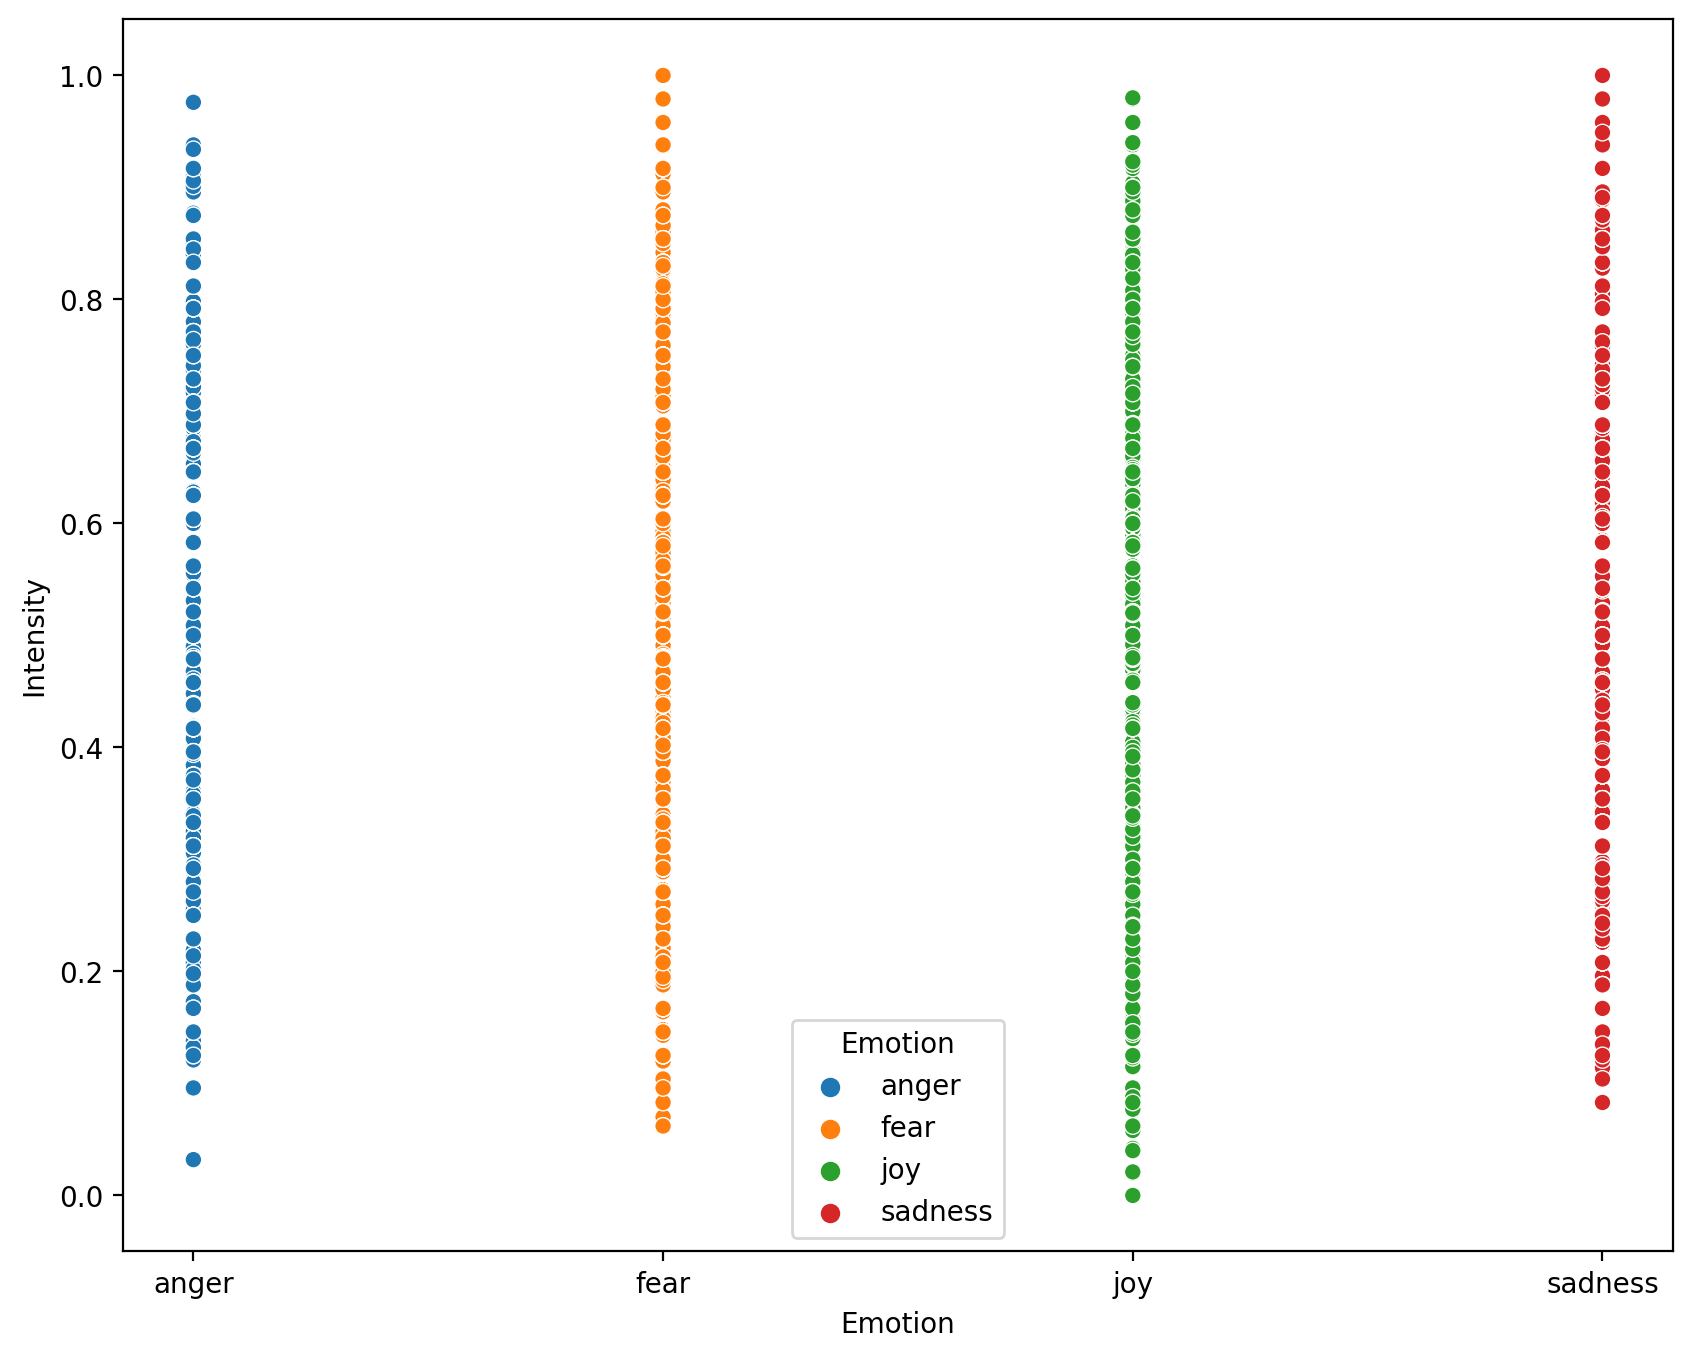

In [ ]:
plt.figure(figsize=(10,8),dpi=200)
sns.scatterplot(data=df, x='Emotion',y='Intensity',hue='Emotion')

<Figure size 2000x1600 with 0 Axes>

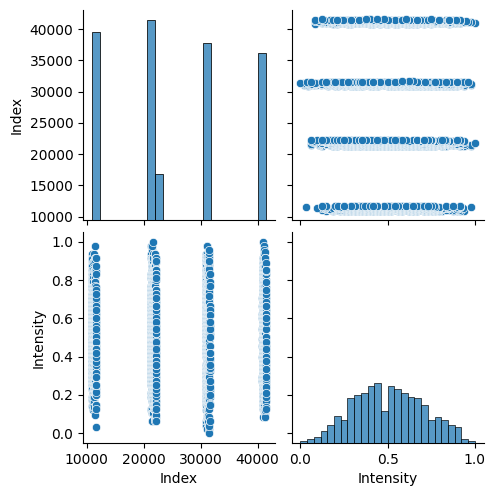

In [ ]:
plt.figure(figsize=(10,8),dpi=200)
sns.pairplot(data=df)

<Figure size 2000x1600 with 0 Axes>

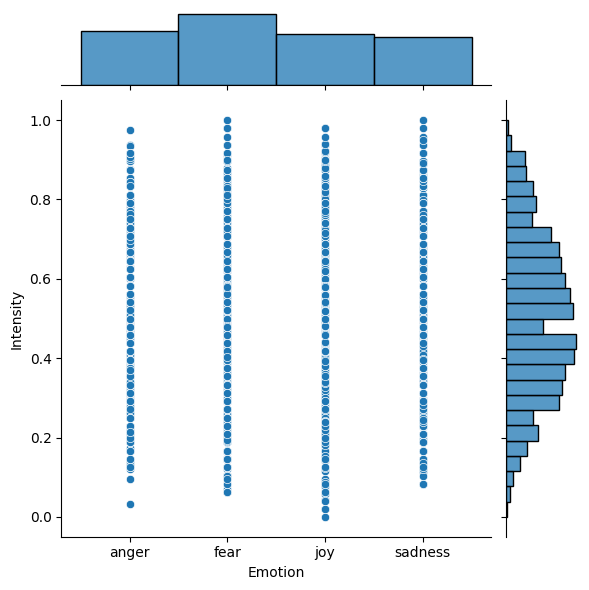

In [ ]:
plt.figure(figsize=(10,8),dpi=200)
sns.jointplot(data=df,x='Emotion',y='Intensity')

<Axes: xlabel='Intensity', ylabel='Count'>

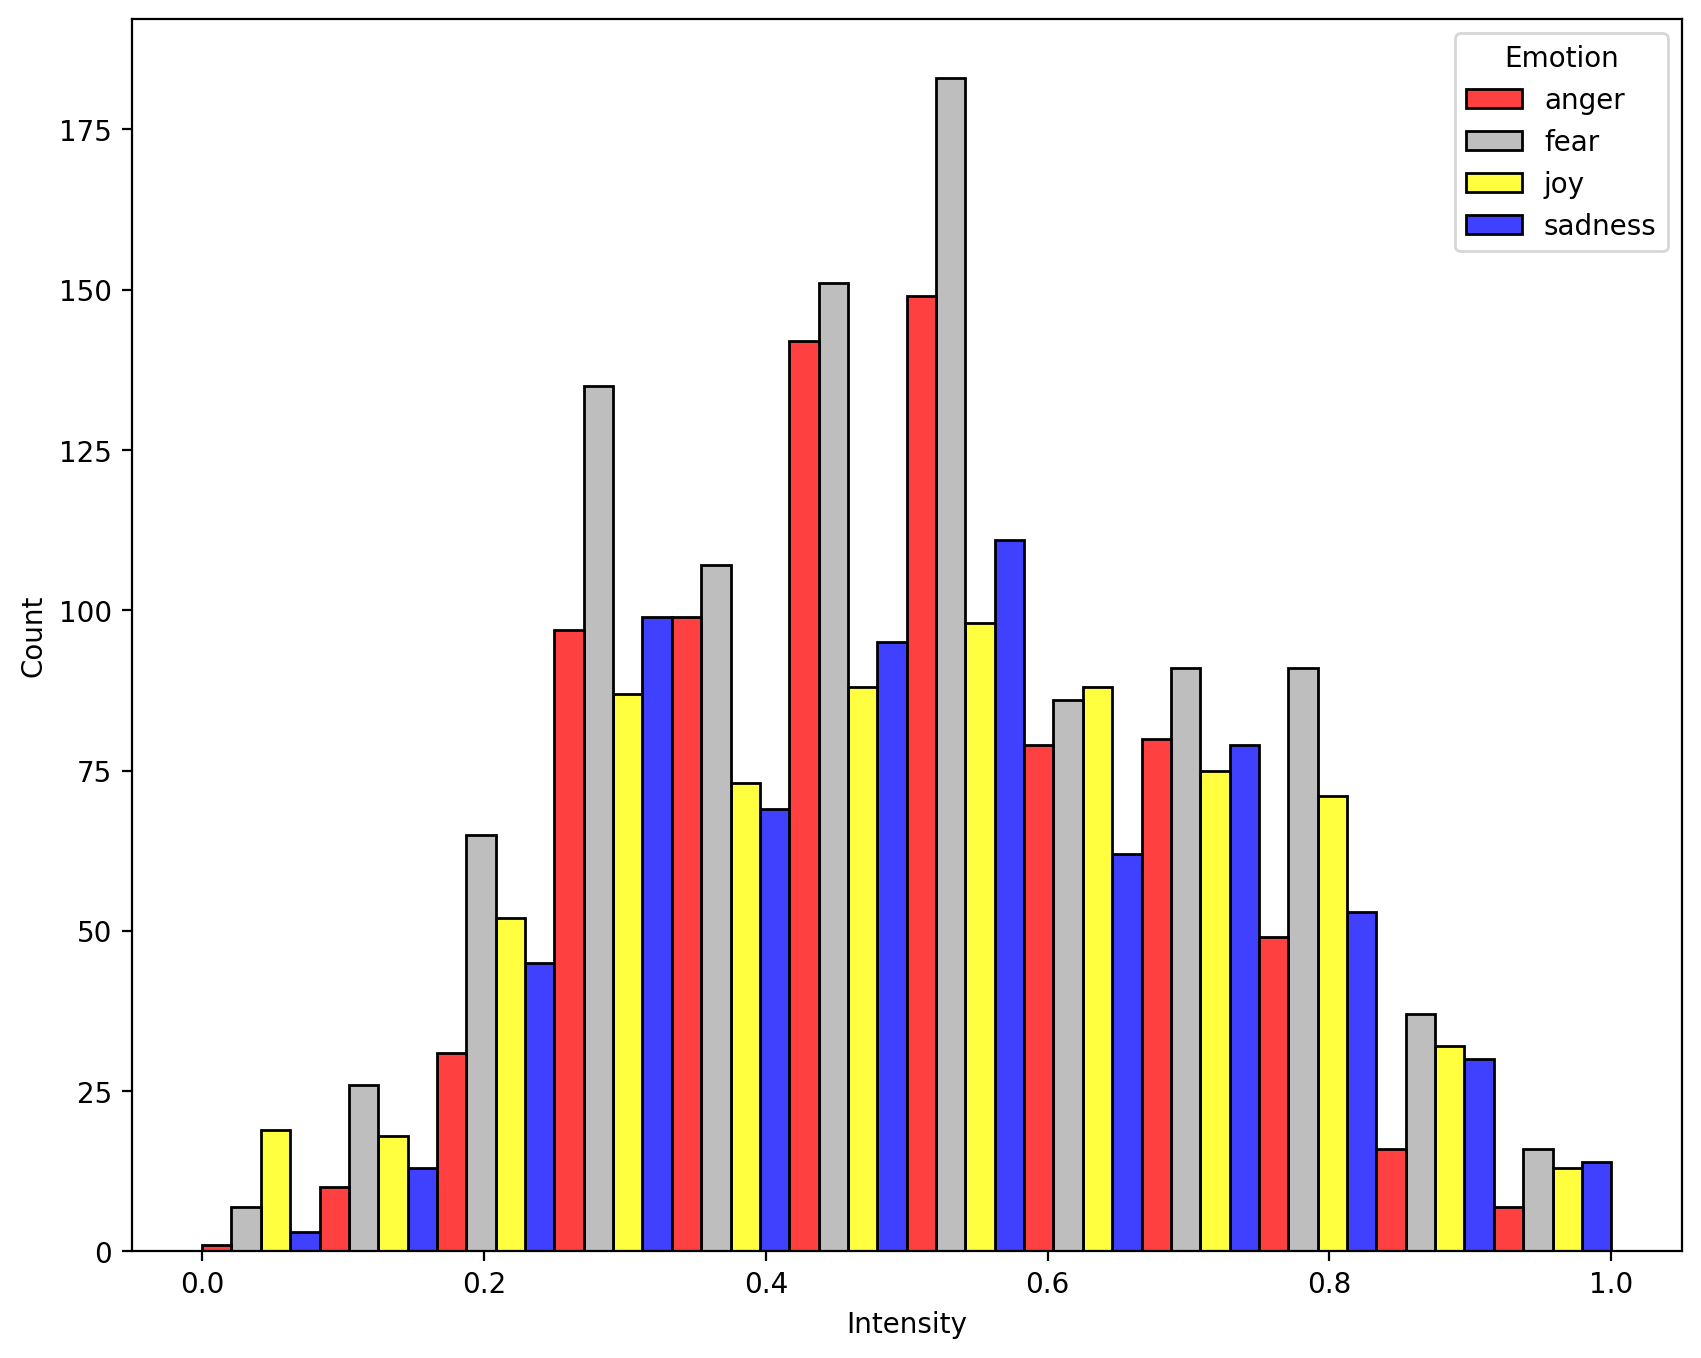

In [ ]:
plt.figure(figsize=(10,8),dpi=200)
sns.histplot(data=df,x='Intensity',hue='Emotion',element='bars',multiple='dodge',stat='count',bins=12,legend=True,palette=['red','#a9a9a9',"yellow","blue"])


In [ ]:
import pandas as pd

results_df = pd.DataFrame({'Metric':['Classifcation Loss','Regression Loss','Training F1','Test F1', 'Validation F1','Training R2', 'Test R2', 'Validation R2','Max Epoch','Optimzizer','Learning Rate','Patience','Batch Size']})
results_df

Metric
0   Classifcation Loss
1      Regression Loss
2          Training F1
3              Test F1
4        Validation F1
5          Training R2
6              Test R2
7        Validation R2
8            Max Epoch
9           Optimzizer
10       Learning Rate
11            Patience
12          Batch Size

# BERT Multi-task Modal with Classification + Regression


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


average_combined_val_loss:0.351980097591877
all_true_train_outputs:[tensor(0.3960), tensor(0.7500), tensor(0.3750), tensor(0.1880), tensor(0.3460), tensor(0.3400), tensor(0.3960), tensor(0.2500), tensor(0.3750), tensor(0.3750), tensor(0.1880), tensor(0.5000), tensor(0.4790), tensor(0.4580), tensor(0.6040), tensor(0.1000), tensor(0.3360), tensor(0.3960), tensor(0.2290), tensor(0.3540), tensor(0.7290), tensor(0.1460), tensor(0.4380), tensor(0.5000), tensor(0.2710), tensor(0.5210), tensor(0.4580), tensor(0.3330), tensor(0.5210), tensor(0.8600), tensor(0.5210), tensor(0.2500), tensor(0.6880), tensor(0.6670), tensor(0.4580), tensor(0.5210), tensor(0.9170), tensor(0.2080), tensor(0.5210), tensor(0.8100), tensor(0.6250), tensor(0.5830), tensor(0.4790), tensor(0.1670), tensor(0.3960), tensor(0.6040), tensor(0.3330), tensor(0.6460), tensor(0.3200), tensor(0.3120), tensor(0.8960), tensor(0.9380), tensor(0.3120), tensor(0.4800), tensor(0.3960), tensor(0.9580), tensor(0.4170), tensor(0.5330), tens

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


average_combined_val_loss:0.2747969590127468
all_true_train_outputs:[tensor(0.5210), tensor(0.3120), tensor(0.3750), tensor(0.5420), tensor(0.0620), tensor(0.4380), tensor(0.5210), tensor(0.3960), tensor(0.2920), tensor(0.4170), tensor(0.7920), tensor(0.3540), tensor(0.1720), tensor(0.3330), tensor(0.8330), tensor(0.5000), tensor(0.6040), tensor(0.7710), tensor(0.4380), tensor(0.7500), tensor(0.4580), tensor(0.5620), tensor(0.6600), tensor(0.5620), tensor(0.4790), tensor(0.3330), tensor(0.6000), tensor(0.1670), tensor(0.5000), tensor(0.5830), tensor(0.3540), tensor(0.4170), tensor(0.8750), tensor(0.7080), tensor(0.3360), tensor(0.5830), tensor(0.7920), tensor(0.8540), tensor(0.2310), tensor(0.3850), tensor(0.5830), tensor(0.3120), tensor(0.6670), tensor(0.4380), tensor(0.5400), tensor(0.5800), tensor(0.6250), tensor(0.8270), tensor(0.3540), tensor(0.3960), tensor(0.7080), tensor(0.4790), tensor(0.3750), tensor(0.3330), tensor(0.3330), tensor(0.4380), tensor(0.1690), tensor(0.5420), ten

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


average_combined_val_loss:0.11717310082167387
all_true_train_outputs:[tensor(0.7290), tensor(0.6460), tensor(0.3960), tensor(0.4170), tensor(0.5270), tensor(0.3960), tensor(0.4170), tensor(0.7920), tensor(0.7920), tensor(0.4580), tensor(0.7000), tensor(0.8750), tensor(0.3540), tensor(0.4790), tensor(0.7710), tensor(0.7500), tensor(0.5830), tensor(0.6670), tensor(0.5400), tensor(0.4240), tensor(0.4790), tensor(0.8960), tensor(0.5580), tensor(0.5000), tensor(0.2710), tensor(0.1250), tensor(0.5620), tensor(0.2400), tensor(0.4790), tensor(0.3560), tensor(0.8120), tensor(0.4380), tensor(0.6040), tensor(0.3540), tensor(0.4660), tensor(0.2710), tensor(0.5000), tensor(0.3750), tensor(0.6200), tensor(0.4580), tensor(0.5830), tensor(0.8750), tensor(0.7080), tensor(0.2000), tensor(0.3750), tensor(0.4790), tensor(0.5620), tensor(0.5620), tensor(0.5420), tensor(0.5420), tensor(0.4580), tensor(0.4170), tensor(0.3060), tensor(0.3330), tensor(0.8330), tensor(0.7290), tensor(0.3960), tensor(0.3800), te

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


average_combined_val_loss:0.3032352179288864
all_true_train_outputs:[tensor(0.5170), tensor(0.5190), tensor(0.4170), tensor(0.4120), tensor(0.3810), tensor(0.5620), tensor(0.5800), tensor(0.5210), tensor(0.5830), tensor(0.5420), tensor(0.6890), tensor(0.5830), tensor(0.8120), tensor(0.7920), tensor(0.3120), tensor(0.5210), tensor(0.4040), tensor(0.7290), tensor(0.1600), tensor(0.2600), tensor(0.6000), tensor(0.2540), tensor(0.1890), tensor(0.5210), tensor(0.4790), tensor(0.6670), tensor(0.3960), tensor(0.5210), tensor(0.4330), tensor(0.3750), tensor(0.2500), tensor(0.3400), tensor(0.7920), tensor(0.3120), tensor(0.3960), tensor(0.3330), tensor(0.5210), tensor(0.3750), tensor(0.2000), tensor(0.8150), tensor(0.4810), tensor(0.7500), tensor(0.3960), tensor(0.3220), tensor(0.3960), tensor(0.4830), tensor(0.3330), tensor(0.8120), tensor(0.4580), tensor(0.4170), tensor(0.3830), tensor(0.7710), tensor(0.8120), tensor(0.8330), tensor(0.6040), tensor(0.4790), tensor(0.2710), tensor(0.4580), ten

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


average_combined_val_loss:0.13855618704110384
all_true_train_outputs:[tensor(0.7290), tensor(0.4790), tensor(0.2710), tensor(0.4790), tensor(0.2710), tensor(0.2400), tensor(0.2710), tensor(0.4470), tensor(0.2710), tensor(0.3330), tensor(0.5000), tensor(0.3960), tensor(0.5210), tensor(0.4790), tensor(0.2630), tensor(0.3400), tensor(0.4800), tensor(0.2710), tensor(0.2290), tensor(0.5420), tensor(0.6040), tensor(0.4800), tensor(0.6040), tensor(0.2290), tensor(0.1250), tensor(0.7710), tensor(0.8960), tensor(0.2660), tensor(0.7080), tensor(0.3540), tensor(0.5420), tensor(0.4210), tensor(0.5360), tensor(0.9380), tensor(0.6000), tensor(0.3060), tensor(0.9580), tensor(0.3600), tensor(0.3490), tensor(0.5830), tensor(0.0620), tensor(0.1670), tensor(0.5420), tensor(0.5780), tensor(0.3330), tensor(0.8600), tensor(0.6670), tensor(0.9580), tensor(0.6540), tensor(0.4420), tensor(0.1670), tensor(0.4380), tensor(0.6040), tensor(0.7000), tensor(0.5000), tensor(0.1740), tensor(0.3960), tensor(0.3750), te

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


average_combined_val_loss:0.1569301374256611
Early stopping triggered after 6 epochs without improvement.


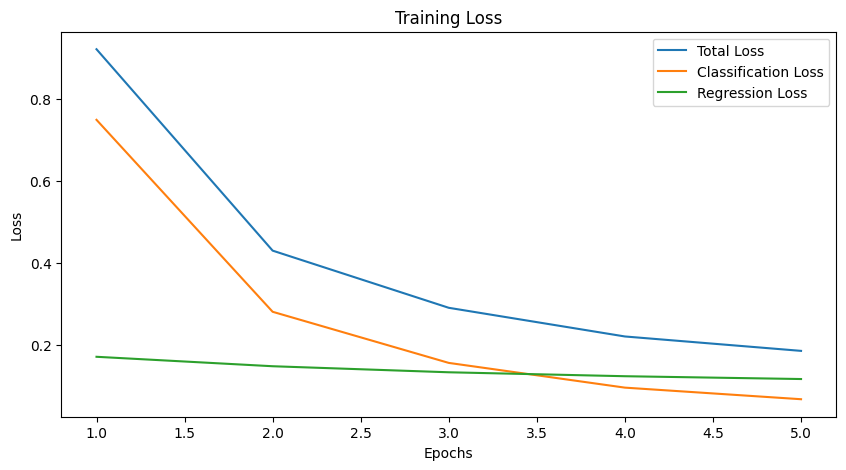

Pearson correlation in evaluate : 0.5921228295527309
P-value Training: 4.070662860711627e-34
reg mse: 0.03288416936993599


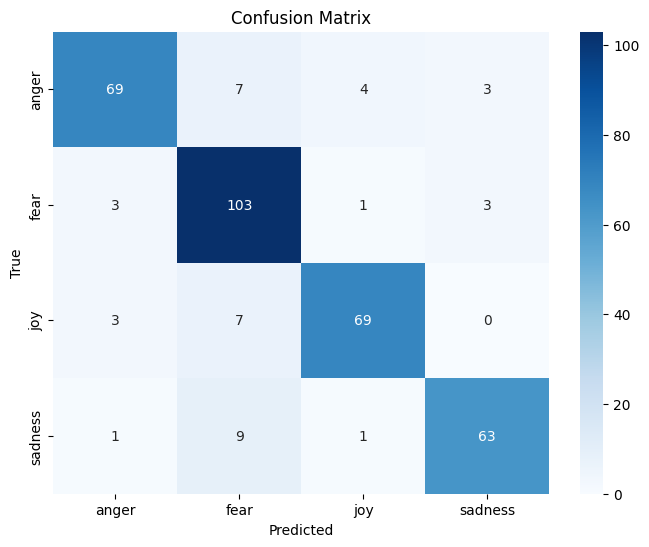

Validation Classification Loss: 0.543, Validation Regression Loss: 0.142
Validation Classification Accuracy: 0.879
Validation Regression Accuracy: 0.044
Validation Correlation Coefficient: 0.592


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Pearson correlation in evaluate : 0.6316311471255261
P-value Training: 0.0
reg mse: 0.03294507786631584


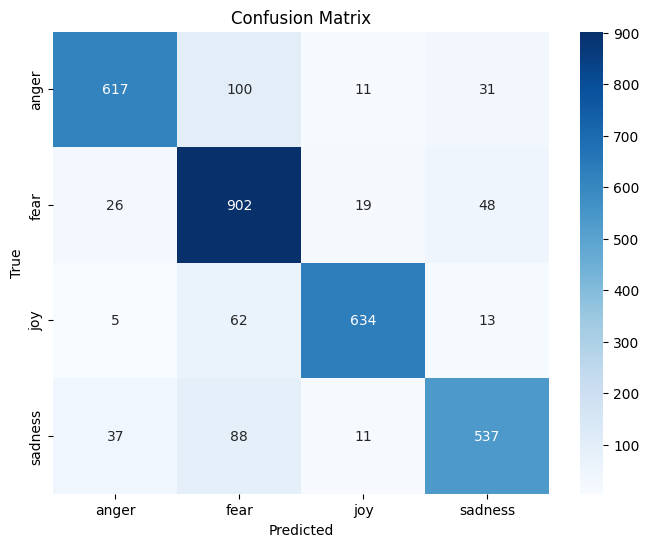

Test Classification Loss: 0.563, Test Regression Loss: 0.146
Test Regression Accuracy: 0.165
Test Classification Accuracy: 0.856
Test Correlation Coefficient: 0.632
predicted_emotion_labels:tensor([2], device='cuda:0')
predicted_intensity_values:[[1.0122126]]
predicted_emotion_labels:tensor([1], device='cuda:0')
predicted_intensity_values:[[0.75153565]]


Metric BERT Multi-task Roberta_MultiTask  \
0   Classifcation Loss        0.056932          0.054059   
1      Regression Loss         0.11032          0.104601   
2          Training F1         0.97507            0.9795   
3              Test F1        0.856415          0.848456   
4        Validation F1        0.878613          0.869942   
5          Training R2        0.382943           0.47699   
6              Test R2        0.164531          0.389894   
7        Validation R2        0.043593          0.256855   
8            Max Epoch               5                17   
9           Optimzizer           AdamW             AdamW   
10       Learning Rate         0.00002           0.00002   
11            Patience               3                 3   
12          Batch Size               4               128   

   Distil_BERT_MultiTaskModal  
0                    0.041506  
1                     0.09053  
2                    0.978976  
3                    0.858962  
4                    0.881503  
5                    0.571183  
6                    0.404828  
7                    0.340538  
8                           8  
9                       AdamW  
10                    0.00002  
11                          3  
12                          8

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW,RobertaTokenizer,RobertaForSequenceClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error as mse,r2_score,f1_score,confusion_matrix
from torch.optim import RMSprop,SGD,Adagrad
import torch.nn as nn
from torcheval.metrics import R2Score
from tidyX import TextPreprocessor as tp
from scipy.stats import pearsonr
import matplotlib.pyplot as plt



# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
classification_model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

class RegressionHead(torch.nn.Module):
    def __init__(self, hidden_size):
        super(RegressionHead, self).__init__()
        self.regression = torch.nn.Linear(hidden_size,1)

    def forward(self, x):
        x = self.regression(x)
        return x

# Define the Multi-Task Emotion Model
class MultiTaskEmotionModel(torch.nn.Module):
    def __init__(self, bert_model, num_classes):
        super(MultiTaskEmotionModel, self).__init__()
        self.bert = bert_model
        self.classification_head = torch.nn.Linear(self.bert.config.hidden_size, num_classes)
        self.regression_head = RegressionHead(self.bert.config.hidden_size)




    def forward(self, input_ids, attention_mask=None):

        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask,output_hidden_states=True)

        pooled_output = outputs.hidden_states[-1][:, 0, :]

        # For classification task
        classification_logits = self.classification_head(pooled_output)


        # For regression task
        regression_output = self.regression_head(pooled_output)


        return classification_logits, regression_output

labels_classification_encoded= []

# Function to load and preprocess the data
def load_data(file_path, tokenizer):
    texts = []
    labels_classification = []
    labels_regression = []


    with open(file_path, encoding='utf-8') as f:
        next(f)  # Skip the header line
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 4:
              text, emotion, intensity =  parts[1], parts[2], float(parts[3])
              #Preprocess Text
              # if intensity > 0.05  and intensity < 0.95:
              #   preprocessed_text = tp.preprocess(text,delete_emojis=False)
              texts.append(text)
              labels_classification.append(emotion)
              labels_regression.append(intensity)


    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

    # Use label encoding for emotion labels
    emotion_label_encoder = LabelEncoder()
    labels_classification_encoded = emotion_label_encoder.fit_transform(labels_classification)

    labels_classification = torch.tensor(labels_classification_encoded)
    labels_regression = torch.tensor(labels_regression,dtype=torch.float)


    return TensorDataset(inputs.input_ids, inputs.attention_mask, labels_classification, labels_regression)

# # Load the data
train_dataset = load_data('home/train.txt', tokenizer)
valid_dataset = load_data('home/dev.txt', tokenizer)
test_dataset = load_data('home/test.txt', tokenizer)

# Create DataLoader objects
BATCH_SIZE = 4
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE,shuffle=True)

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the multi-task model
NUM_CLASSES = 4  # Number of emotion categories (anger, fear, joy, sadness)
multi_task_model = MultiTaskEmotionModel(classification_model, num_classes=NUM_CLASSES)
multi_task_model.to(device)

LEARNING_RATE = 2e-5
OPTIMIZER = 'AdamW'

# Set up the optimizer and loss functions
optimizer = torch.optim.AdamW(multi_task_model.parameters(), lr=LEARNING_RATE)
# optimizer = RMSprop(multi_task_model.parameters(), lr=LEARNING_RATE)
# optimizer = SGD(multi_task_model.parameters(), lr=LEARNING_RATE,momentum=0)
# optimizer = Adagrad(multi_task_model.parameters(), lr=LEARNING_RATE)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)



classification_criterion = torch.nn.CrossEntropyLoss()
# classification_criterion = torch.nn.BCEWithLogitsLoss()
# regression_criterion = torch.nn.MSELoss()
regression_criterion = nn.L1Loss()

# Train the multi-task model
NUM_EPOCHS = 30
# Early stopping parameters
early_stopping_patience = 3  # Number of epochs to wait for improvement
best_combined_loss = float('inf')  # Initialize the best validation loss
no_improvement_count = 0  # Initialize the count for the number of epochs with no improvement
list_total_train_loss = []
list_train_regression_loss = []
list_train_classification_loss = []

for epoch in range(NUM_EPOCHS):
    multi_task_model.train()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    total_val_classification_loss = 0.0
    total_val_regression_loss = 0.0
    combined_val_total_loss =0.0
    #train
    all_predicted_train_labels = []
    all_true_train_labels = []
    all_predicted_train_outputs = []
    all_true_train_outputs = []



    for batch in train_loader:
        batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        classification_logits, regression_output = multi_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        # Compute losses for classification and regression tasks
        classification_loss = classification_criterion(classification_logits, batch_labels_classification)


        # regression_loss
        regression_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)


        # Total loss is a weighted combination of classification and regression losses
        total_loss = classification_loss + regression_loss


        total_loss.backward()
        optimizer.step()

        ## The loss is aggregated for each iteration representing a batch to come with the combined loss of whole epoch for classification and regression
        total_classification_loss += classification_loss.item()
        total_regression_loss += regression_loss.item()


        ## Classification Accuracy variables
        predicted_labels = classification_logits.argmax(dim=1)
        all_predicted_train_labels.extend(predicted_labels.cpu().numpy())
        all_true_train_labels.extend(batch_labels_classification.cpu().numpy())


        # Regression Training Accuracy outputs
        predicted_outputs = regression_output.cpu().detach().numpy()
        true_outputs = batch_labels_regression.cpu()

        all_predicted_train_outputs.extend(predicted_outputs.flatten())
        all_true_train_outputs.extend(true_outputs)




    ## Validation

    for batch in valid_loader:
        multi_task_model.eval()
        batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        classification_logits, regression_output = multi_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        # Compute losses for classification and regression tasks
        classification_val_loss = classification_criterion(classification_logits, batch_labels_classification)


        regression_val_loss = regression_criterion(regression_output, batch_labels_regression)


        # Total loss is a weighted combination of classification and regression losses
        combined_val_loss = classification_val_loss + regression_val_loss

        total_val_classification_loss += classification_loss.item()
        total_val_regression_loss += regression_loss.item()
        combined_val_total_loss = total_val_classification_loss + total_val_regression_loss





    average_combined_val_loss = combined_val_total_loss/len(valid_loader)
    print(f'average_combined_val_loss:{average_combined_val_loss}')
    # Check for early stopping
    if average_combined_val_loss < best_combined_loss:
        best_combined_loss = average_combined_val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    # If there's no improvement for the specified patience, stop training
    if no_improvement_count >= early_stopping_patience:
        print(f'Early stopping triggered after {epoch + 1} epochs without improvement.')
        break



    ## Training Metrics
    classification_train_accuracy = f1_score(all_true_train_labels, all_predicted_train_labels,average='weighted')

    ## Calculate Regression Accuracy using R2
    regression_train_accuracy = r2_score(all_true_train_outputs,all_predicted_train_outputs)

    print(f'all_true_train_outputs:{all_true_train_outputs}')
    print(f'all_predicted_train_outputs:{all_predicted_train_outputs}')



    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}, '
          f'Classification Loss: {total_classification_loss / len(train_loader):.3f}, '
          f'Regression Loss: {total_regression_loss / len(train_loader):.3f}')

    print(f'Clasification Training F1 Score: {classification_train_accuracy}')
    print(f'Regression Training R2 Score {regression_train_accuracy}')

    class_loss = total_classification_loss / len(train_loader)
    reg_loss = total_regression_loss / len(train_loader)

    ##Total Regression Loss are added for each epoch
    list_train_regression_loss.append(reg_loss)

    ##Total Classification Loss is added for each epoch
    list_train_classification_loss.append(class_loss)

    ## Combined Training loss
    list_total_train_loss.append(reg_loss + class_loss)

    print(f'list_train_regression_loss:{list_train_regression_loss}')

# Plotting loss with epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epoch + 1), list_total_train_loss, label='Total Loss')
plt.plot(range(1, epoch + 1), list_train_classification_loss, label='Classification Loss')
plt.plot(range(1, epoch + 1), list_train_regression_loss, label='Regression Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Function for evaluation
def evaluate_model(model, data_loader, classification_criterion, regression_criterion):
    model.eval()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    all_predicted_labels = []
    all_true_labels = []
    all_predicted_outputs = []
    all_true_outputs = []

    with torch.no_grad():
      for batch in data_loader:
          batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = batch
          batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = \
              batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device), batch_labels_regression.to(device)


          # classification_logits, regression_output = model(input_ids, attention_mask=attention_mask)
          classification_logits, regression_output = model(batch_input_ids, attention_mask=batch_attention_mask)

          ## Classification Accuracy
          predicted_labels = classification_logits.argmax(dim=1)

          all_predicted_labels.extend(predicted_labels.cpu().numpy())
          all_true_labels.extend(batch_labels_classification.cpu().numpy())

          ## Regression Accuracy Variables
          ## Round predicted output to 3 decimals as per the input
          predicted_outputs = np.round(regression_output.flatten().cpu(),decimals=3)
          true_outputs = batch_labels_regression.cpu()

          # all_predicted_outputs.extend(predicted_outputs)
          all_predicted_outputs.extend(predicted_outputs.flatten())

          all_true_outputs.extend(true_outputs)



          classification_loss = classification_criterion(classification_logits, batch_labels_classification)
          regression_loss = regression_criterion(regression_output.squeeze(),batch_labels_regression)



          total_classification_loss += classification_loss.item()
          total_regression_loss += regression_loss.item()

    #Classification Accuracy
    classification_accuracy = accuracy_score(all_true_labels, all_predicted_labels)

    ## Regression Accuracy
    regression_r2_score = r2_score(all_true_outputs, all_predicted_outputs)

    ##Pearson correlation
    correlation_coefficient, p_value = pearsonr(all_predicted_outputs, all_true_outputs)
    print(f"Pearson correlation in evaluate : {correlation_coefficient}")
    print(f"P-value Training: {p_value}")

    ## Calculate Mean Squared Error
    reg_mse = mse(all_true_outputs,all_predicted_outputs)

    print(f'reg mse: {reg_mse}')



    avg_classification_loss = total_classification_loss / len(data_loader)
    avg_regression_loss = total_regression_loss / len(data_loader)

    ## Visualizations
    # Compute confusion matrix
    conf_matrix = confusion_matrix(all_true_labels, all_predicted_labels)

    # Visualize confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['anger', 'fear', 'joy', 'sadness'],
                yticklabels=['anger', 'fear', 'joy', 'sadness'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return avg_classification_loss, avg_regression_loss, classification_accuracy,regression_r2_score, correlation_coefficient

# # Evaluate the model on the validation set
valid_classification_loss, valid_regression_loss, valid_classification_accuracy, valid_regression_accuracy,valid_correlation_coefficient = evaluate_model(multi_task_model, valid_loader,
                                                                   classification_criterion, regression_criterion)
print(f'Validation Classification Loss: {valid_classification_loss:.3f}, '
      f'Validation Regression Loss: {valid_regression_loss:.3f}')
print(f'Validation Classification Accuracy: {valid_classification_accuracy:.3f}')
print(f'Validation Regression Accuracy: {valid_regression_accuracy:.3f}')
print(f'Validation Correlation Coefficient: {valid_correlation_coefficient:.3f}')




# Evaluate the model on the test set
test_classification_loss, test_regression_loss,test_classification_accuracy,test_regression_accuracy,test_correlation_coefficient = evaluate_model(multi_task_model, test_loader,
                                                                 classification_criterion, regression_criterion)



print(f'Test Classification Loss: {test_classification_loss:.3f}, '
      f'Test Regression Loss: {test_regression_loss:.3f}')
print(f'Test Regression Accuracy: {test_regression_accuracy:.3f}')
print(f'Test Classification Accuracy: {test_classification_accuracy:.3f}')
print(f'Test Correlation Coefficient: {test_correlation_coefficient:.3f}')



# Use the trained model to predict custom input
tokenized_custom = tokenizer('What a wonderful and amazing day today', padding=True, truncation=True, return_tensors='pt')
custom_input_ids = tokenized_custom['input_ids']
custom_attention_mask = tokenized_custom['attention_mask']

tokenized_custom1 = tokenizer('I was shocked to hear the news about the war', padding=True, truncation=True, return_tensors='pt')
custom_input_ids1 = tokenized_custom1['input_ids']
custom_attention_mask1 = tokenized_custom1['attention_mask']



custom_input_ids = custom_input_ids.to(device)
custom_attention_mask = custom_attention_mask.to(device)

custom_input_ids1 = custom_input_ids1.to(device)
custom_attention_mask1 = custom_attention_mask1.to(device)

# Forward pass
with torch.no_grad():
    classification_logits, regression_output = multi_task_model(custom_input_ids, attention_mask=custom_attention_mask)
    classification_logits1, regression_output1 = multi_task_model(custom_input_ids1, attention_mask=custom_attention_mask1)



# Decode the classification output (if needed)
predicted_emotion_labels =  classification_logits.argmax(dim=1)


# Get the regression output
predicted_intensity_values = regression_output.cpu().numpy()


print(f"predicted_emotion_labels:{predicted_emotion_labels}")
print(f"predicted_intensity_values:{predicted_intensity_values}")

# Decode the classification output (if needed)
predicted_emotion_labels1 =  classification_logits1.argmax(dim=1)


# Get the regression output
predicted_intensity_values1 = regression_output1.cpu().numpy()


print(f"predicted_emotion_labels:{predicted_emotion_labels1}")
print(f"predicted_intensity_values:{predicted_intensity_values1}")

results_df['BERT Multi-task'] = [total_classification_loss / len(train_loader),total_regression_loss / len(train_loader),classification_train_accuracy,test_classification_accuracy,valid_classification_accuracy,regression_train_accuracy,test_regression_accuracy,valid_regression_accuracy,epoch,OPTIMIZER,LEARNING_RATE,early_stopping_patience, BATCH_SIZE]
results_df




# Roberta Multi-task (Emotion classification and Intensity detection)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


average_combined_val_loss:1.4827744513750076
Epoch 1/30, Classification Loss: 1.387, Regression Loss: 0.298
Clasification Training F1 Score: 0.20412565550399653
average_combined_val_loss:1.1702239513397217
Epoch 2/30, Classification Loss: 1.261, Regression Loss: 0.175
Clasification Training F1 Score: 0.35810166427807266
average_combined_val_loss:0.7776361107826233
Epoch 3/30, Classification Loss: 0.740, Regression Loss: 0.167
Clasification Training F1 Score: 0.715106602417368
average_combined_val_loss:0.5601470023393631
Epoch 4/30, Classification Loss: 0.471, Regression Loss: 0.156
Clasification Training F1 Score: 0.8310133201709783
average_combined_val_loss:0.7461997270584106
Epoch 5/30, Classification Loss: 0.336, Regression Loss: 0.152
Clasification Training F1 Score: 0.8840503087875557
average_combined_val_loss:0.33494164794683456
Epoch 6/30, Classification Loss: 0.258, Regression Loss: 0.136
Clasification Training F1 Score: 0.9047840216745004
average_combined_val_loss:0.3914404213

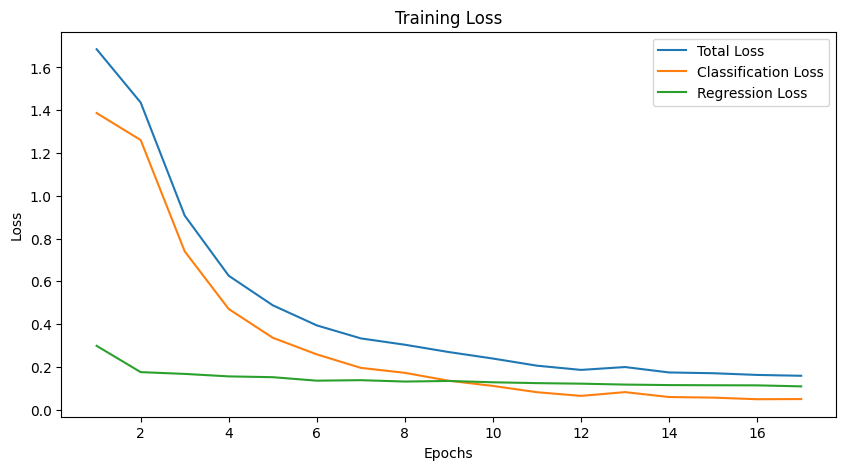

Pearson correlation in evaluate : 0.5893072403207424
P-value Training: 9.848261577989693e-34


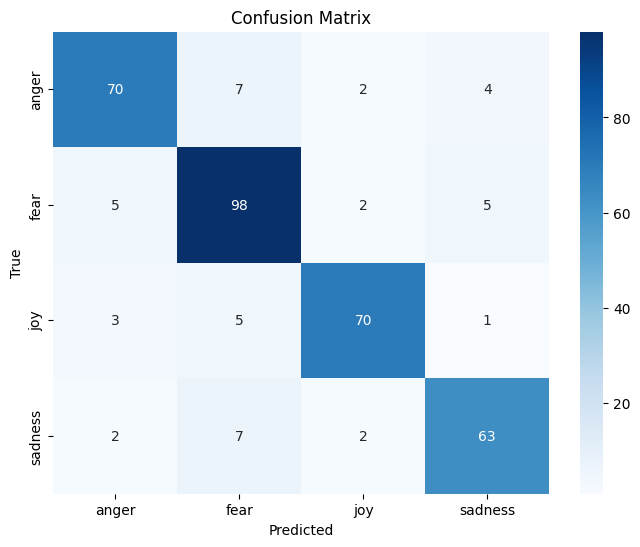

Validation Classification Loss: 0.520, Validation Regression Loss: 0.128
Validation Classification Accuracy: 0.870
Validation Regression Accuracy: 0.257
Valid Pearson correlation: 0.589
Pearson correlation in evaluate : 0.6753787598267287
P-value Training: 0.0


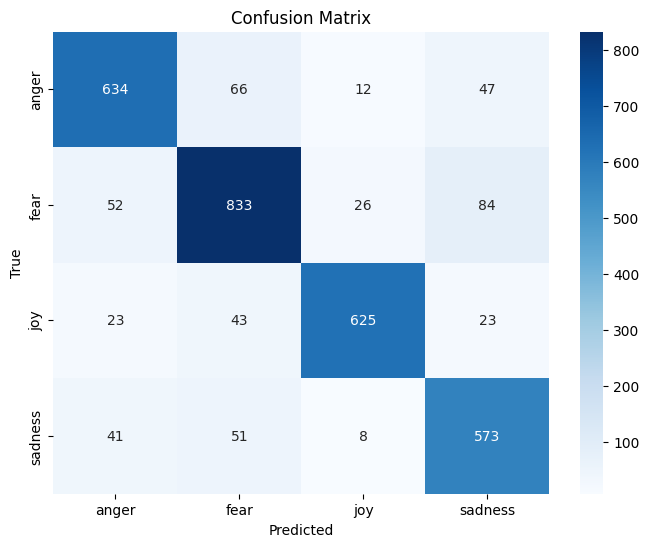

Test Classification Loss: 0.593, Test Regression Loss: 0.121
Test Regression Accuracy: 0.390
Test Classification Accuracy: 0.848
Test Pearson correlation: 0.675


Metric BERT Multi-task Roberta_MultiTask  \
0   Classifcation Loss        0.056979          0.054059   
1      Regression Loss        0.108563          0.104601   
2          Training F1         0.97865            0.9795   
3              Test F1        0.844317          0.848456   
4        Validation F1        0.864162          0.869942   
5          Training R2        0.454134           0.47699   
6              Test R2        0.340289          0.389894   
7        Validation R2        0.106641          0.256855   
8            Max Epoch               8                17   
9           Optimzizer           AdamW             AdamW   
10       Learning Rate         0.00002           0.00002   
11            Patience               3                 3   
12          Batch Size              64               128   

   Distil_BERT_MultiTaskModal  
0                    0.041506  
1                     0.09053  
2                    0.978976  
3                    0.858962  
4                    0.881503  
5                    0.571183  
6                    0.404828  
7                    0.340538  
8                           8  
9                       AdamW  
10                    0.00002  
11                          3  
12                          8

In [ ]:
## Roberta Multi-task Modal

import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW,RobertaTokenizer,RobertaForSequenceClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score,f1_score,confusion_matrix
from tidyX import TextPreprocessor as tp
from scipy.stats import pearsonr
import matplotlib.pyplot as plt


# Load pre-trained BERT tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
pre_trained_model = RobertaForSequenceClassification.from_pretrained('roberta-base')

# Define the Multi-Task Emotion Model
class MultiTaskEmotionModel(torch.nn.Module):
    def __init__(self, bert_model, num_classes):
        super(MultiTaskEmotionModel, self).__init__()
        self.bert = bert_model
        self.classification_head = torch.nn.Linear(self.bert.config.hidden_size, num_classes)
        self.regression_head = torch.nn.Linear(self.bert.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask=None):
        # print(f"input_ids: {input_ids}")
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask,output_hidden_states=True)

        # Extract last hidden state
        pooled_output = outputs.hidden_states[-1][:, 0, :]

        # For classification task
        classification_logits = self.classification_head(pooled_output)


        # For regression task
        regression_output = self.regression_head(pooled_output)



        return classification_logits, regression_output

# Function to load and preprocess the data
def load_data(file_path, tokenizer):
    texts = []
    labels_classification = []
    labels_regression = []

    with open(file_path, encoding='utf-8') as f:
        next(f)  # Skip the header line
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 4:
              text, emotion, intensity =  parts[1], parts[2], float(parts[3])
              # if intensity > 0.05  and intensity < 0.95:
              #   preprocessed_text = tp.preprocess(text,delete_emojis=False)
              texts.append(text)
              labels_classification.append(emotion)
              labels_regression.append(intensity)



    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

    # Use label encoding for emotion labels
    emotion_label_encoder = LabelEncoder()
    labels_classification_encoded = emotion_label_encoder.fit_transform(labels_classification)

    labels_classification = torch.tensor(labels_classification_encoded)

    labels_regression = torch.tensor(labels_regression,dtype=torch.float)


    return TensorDataset(inputs.input_ids, inputs.attention_mask, labels_classification, labels_regression)

# # Load the data
train_dataset = load_data('home/train.txt', tokenizer)
valid_dataset = load_data('home/dev.txt', tokenizer)
test_dataset = load_data('home/test.txt', tokenizer)

# Create DataLoader objects
BATCH_SIZE = 128
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE,shuffle=True)

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the multi-task model
NUM_CLASSES = 4  # Number of emotion categories (anger, fear, joy, sadness)
multi_task_model = MultiTaskEmotionModel(pre_trained_model, num_classes=NUM_CLASSES)
multi_task_model.to(device)

LEARNING_RATE = 2e-5
OPTIMIZER = 'AdamW'
# Set up the optimizer and loss functions
optimizer = AdamW(multi_task_model.parameters(), lr=LEARNING_RATE)
classification_criterion = torch.nn.CrossEntropyLoss()
regression_criterion = torch.nn.L1Loss()

# Train the multi-task model
NUM_EPOCHS = 30
# Early stopping parameters
early_stopping_patience = 3  # Number of epochs to wait for improvement
best_combined_loss = float('inf')  # Initialize the best validation loss
no_improvement_count = 0  # Initialize the count for the number of epochs with no improvement


list_total_train_loss = []
list_train_regression_loss = []
list_train_classification_loss = []

for epoch in range(NUM_EPOCHS):
    multi_task_model.train()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    total_val_classification_loss = 0.0
    total_val_regression_loss = 0.0
    combined_val_total_loss =0.0
    #train
    all_predicted_train_labels = []
    all_true_train_labels = []
    all_predicted_train_outputs = []
    all_true_train_outputs = []



    for batch in train_loader:
        batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        classification_logits, regression_output = multi_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        # Compute losses for classification and regression tasks
        classification_loss = classification_criterion(classification_logits, batch_labels_classification)
        regression_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)


        # Total loss is a weighted combination of classification and regression losses
        total_loss = classification_loss + regression_loss

        total_loss.backward()
        optimizer.step()

        total_classification_loss += classification_loss.item()
        total_regression_loss += regression_loss.item()

        ## Classification Accuracy variables
        predicted_labels = classification_logits.argmax(dim=1)
        all_predicted_train_labels.extend(predicted_labels.cpu().numpy())
        all_true_train_labels.extend(batch_labels_classification.cpu().numpy())


        # Regression Training Accuracy outputs
        predicted_outputs = regression_output.flatten()
        true_outputs = batch_labels_regression

        all_predicted_train_outputs.extend(predicted_outputs)
        all_true_train_outputs.extend(true_outputs)


    ## Validation
    for batch in valid_loader:
        multi_task_model.eval()
        batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        classification_logits, regression_output = multi_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        # Compute losses for classification and regression tasks
        classification_val_loss = classification_criterion(classification_logits, batch_labels_classification)


        regression_val_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)


        # Total loss is a weighted combination of classification and regression losses
        combined_val_loss = classification_val_loss + regression_val_loss

        total_val_classification_loss += classification_loss.item()
        total_val_regression_loss += regression_loss.item()
        combined_val_total_loss = total_val_classification_loss + total_val_regression_loss





    average_combined_val_loss = combined_val_total_loss/len(valid_loader)
    print(f'average_combined_val_loss:{average_combined_val_loss}')
    # Check for early stopping
    if average_combined_val_loss < best_combined_loss:
        best_combined_loss = average_combined_val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    # If there's no improvement for the specified patience, stop training
    if no_improvement_count >= early_stopping_patience:
        print(f'Early stopping triggered after {epoch + 1} epochs without improvement.')
        break



    ## Calculate Classification Accuracy
    classification_accuracy = f1_score(all_true_train_labels, all_predicted_train_labels,average='weighted')

    ## Calculate Regression Accuracy using R2
    regression_train_accuracy = r2_score([item.detach().cpu().numpy() for item in all_true_train_outputs], [item.detach().cpu().numpy() for item in all_predicted_train_outputs])


    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}, '
          f'Classification Loss: {total_classification_loss / len(train_loader):.3f}, '
          f'Regression Loss: {total_regression_loss / len(train_loader):.3f}')

    print(f'Clasification Training F1 Score: {classification_accuracy}')

    avg_class_loss = total_classification_loss / len(train_loader)
    avg_reg_loss = total_regression_loss / len(train_loader)

    ##Total Regression Loss are added for each epoch
    list_train_regression_loss.append(avg_reg_loss)

    ##Total Classification Loss is added for each epoch
    list_train_classification_loss.append(avg_class_loss)

    ## Combined Training loss
    list_total_train_loss.append(avg_reg_loss + avg_class_loss)


# Plotting Training loss with epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epoch + 1), list_total_train_loss, label='Total Loss')
plt.plot(range(1, epoch + 1), list_train_classification_loss, label='Classification Loss')
plt.plot(range(1, epoch + 1), list_train_regression_loss, label='Regression Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Function for evaluation
def evaluate_model(model, data_loader, classification_criterion, regression_criterion):
    model.eval()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    all_predicted_labels = []
    all_true_labels = []
    all_predicted_outputs = []
    all_true_outputs = []

    with torch.no_grad():
        for batch in data_loader:
            batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = batch
            batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = \
                batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device), batch_labels_regression.to(device)


            classification_logits, regression_output = model(batch_input_ids, attention_mask=batch_attention_mask)


            ## Classification Accuracy
            predicted_labels = classification_logits.argmax(dim=1)

            all_predicted_labels.extend(predicted_labels.cpu().numpy())
            all_true_labels.extend(batch_labels_classification.cpu().numpy())

            ## Regression Accuracy Variables
            predicted_outputs = regression_output.flatten().cpu()


            true_outputs = batch_labels_regression.cpu()

            all_predicted_outputs.extend(predicted_outputs)
            all_true_outputs.extend(true_outputs)



            classification_loss = classification_criterion(classification_logits, batch_labels_classification)
            regression_loss = regression_criterion(regression_output.squeeze(),batch_labels_regression)



            total_classification_loss += classification_loss.item()
            total_regression_loss += regression_loss.item()

    #Classification Accuracy
    classification_accuracy = accuracy_score(all_true_labels, all_predicted_labels)


    # Calculate the R-squared (R2) score
    regression_accuracy = r2_score(all_true_outputs, all_predicted_outputs)


    ##Pearson correlation
    correlation_coefficient, p_value = pearsonr(all_predicted_outputs, all_true_outputs)
    print(f"Pearson correlation in evaluate : {correlation_coefficient}")
    print(f"P-value Training: {p_value}")

    avg_classification_loss = total_classification_loss / len(data_loader)
    avg_regression_loss = total_regression_loss / len(data_loader)

    ## Visualizations
    # Create confusion matrix
    conf_matrix = confusion_matrix(all_true_labels, all_predicted_labels)

    # plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['anger', 'fear', 'joy', 'sadness'],
                yticklabels=['anger', 'fear', 'joy', 'sadness'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return avg_classification_loss, avg_regression_loss, classification_accuracy,regression_accuracy,correlation_coefficient

# # Evaluate the model on the validation set
valid_classification_loss, valid_regression_loss, valid_classification_accuracy, valid_regression_accuracy,vaild_correlation_coefficient = evaluate_model(multi_task_model, valid_loader,
                                                                   classification_criterion, regression_criterion)
print(f'Validation Classification Loss: {valid_classification_loss:.3f}, '
      f'Validation Regression Loss: {valid_regression_loss:.3f}')
print(f'Validation Classification Accuracy: {valid_classification_accuracy:.3f}')
print(f'Validation Regression Accuracy: {valid_regression_accuracy:.3f}')
print(f'Valid Pearson correlation: {vaild_correlation_coefficient:.3f}')




# Evaluate the model on the test set
test_classification_loss, test_regression_loss,test_classification_accuracy,test_regression_accuracy,test_correlation_coefficient = evaluate_model(multi_task_model, test_loader,
                                                                 classification_criterion, regression_criterion)



print(f'Test Classification Loss: {test_classification_loss:.3f}, '
      f'Test Regression Loss: {test_regression_loss:.3f}')
print(f'Test Regression Accuracy: {test_regression_accuracy:.3f}')
print(f'Test Classification Accuracy: {test_classification_accuracy:.3f}')
print(f'Test Pearson correlation: {test_correlation_coefficient:.3f}')




results_df['Roberta_MultiTask'] = [total_classification_loss / len(train_loader),total_regression_loss / len(train_loader),classification_accuracy,test_classification_accuracy,valid_classification_accuracy,regression_train_accuracy,test_regression_accuracy,valid_regression_accuracy,epoch,OPTIMIZER,LEARNING_RATE,early_stopping_patience, BATCH_SIZE]
results_df



# Roberta Classification

In [ ]:
## Roberta Classification

import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW,RobertaTokenizer,RobertaForSequenceClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score,f1_score,confusion_matrix
from tidyX import TextPreprocessor as tp



# Load pre-trained BERT tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
single_task_model = RobertaForSequenceClassification.from_pretrained('roberta-base')


# Define the Multi-Task Emotion Model
class SingleTaskEmotionModel(torch.nn.Module):
    def __init__(self, bert_model, num_classes):
        super(SingleTaskEmotionModel, self).__init__()
        self.bert = bert_model
        self.classification_head = torch.nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        # print(f"input_ids: {input_ids}")
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask,output_hidden_states=True)

        # Extract last hidden state
        pooled_output = outputs.hidden_states[-1][:, 0, :]

        # For classification task
        classification_logits = self.classification_head(pooled_output)

        return classification_logits

# Function to load and preprocess the data
def load_data(file_path, tokenizer):
    texts = []
    labels_classification = []

    with open(file_path, encoding='utf-8') as f:
        next(f)  # Skip the header line
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 4:
              text, emotion, intensity =  parts[1], parts[2], float(parts[3])
              # if intensity > 0.05  and intensity < 0.95:
                # preprocessed_text = tp.preprocess(text,delete_emojis=False)
              texts.append(text)
              labels_classification.append(emotion)


    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

    # Use label encoding for emotion labels
    emotion_label_encoder = LabelEncoder()
    labels_classification_encoded = emotion_label_encoder.fit_transform(labels_classification)

    labels_classification = torch.tensor(labels_classification_encoded)


    return TensorDataset(inputs.input_ids, inputs.attention_mask, labels_classification)

# # Load the data
train_dataset = load_data('home/train.txt', tokenizer)
valid_dataset = load_data('home/dev.txt', tokenizer)
test_dataset = load_data('home/test.txt', tokenizer)

# Create DataLoader objects
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the multi-task model
NUM_CLASSES = 4  # Number of emotion categories (anger, fear, joy, sadness)
single_task_model = SingleTaskEmotionModel(classification_model, num_classes=NUM_CLASSES)
single_task_model.to(device)

# Hyperparameters
LEARNING_RATE = 2e-5
OPTIMIZER = 'AdamW'
# Set up the optimizer and loss functions
optimizer = AdamW(single_task_model.parameters(), lr=LEARNING_RATE,weight_decay=0.95)
classification_criterion = torch.nn.CrossEntropyLoss()

# Train the single-task model
NUM_EPOCHS = 30
# Early stopping parameters
early_stopping_patience = 3  # Number of epochs to wait for improvement
best_combined_loss = float('inf')  # Initialize the best validation loss
no_improvement_count = 0  # Initialize the count for the number of epochs with no improvement
for epoch in range(NUM_EPOCHS):
    single_task_model.train()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    all_predicted_train_labels = []
    all_true_train_labels = []

    for batch in train_loader:
        batch_input_ids, batch_attention_mask, batch_labels_classification = batch
        batch_input_ids, batch_attention_mask, batch_labels_classification = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device)

        optimizer.zero_grad()
        classification_logits = single_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        # Compute losses for classification and regression tasks
        classification_loss = classification_criterion(classification_logits, batch_labels_classification)


        classification_loss.backward()
        optimizer.step()

        total_classification_loss += classification_loss.item()

        ## Classification Accuracy variables
        predicted_labels = classification_logits.argmax(dim=1)
        all_predicted_train_labels.extend(predicted_labels.cpu().numpy())
        all_true_train_labels.extend(batch_labels_classification.cpu().numpy())

     ## Validation

    for batch in valid_loader:
        single_task_model.eval()
        batch_input_ids, batch_attention_mask, batch_labels_classification = batch
        batch_input_ids, batch_attention_mask, batch_labels_classification = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device)

        optimizer.zero_grad()
        classification_logits = single_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        # Compute losses for classification and regression tasks
        classification_val_loss = classification_criterion(classification_logits, batch_labels_classification)


        total_val_classification_loss += classification_loss.item()


    average_val_loss = classification_val_loss/len(valid_loader)
    print(f'average__val_loss:{average_val_loss}')
    # Check for early stopping
    if average_val_loss < best_combined_loss:
        best_combined_loss = average_val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    # If there's no improvement for the specified patience, stop training
    if no_improvement_count >= early_stopping_patience:
        print(f'Early stopping triggered after {epoch + 1} epochs without improvement.')
        break


    ## Calculate Classification Accuracy
    classification_accuracy = f1_score(all_true_train_labels, all_predicted_train_labels,average='weighted')

    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}, '
          f'Classification Loss: {total_classification_loss / len(train_loader):.3f}')
    print(f'Clasification Training F1 Score: {classification_accuracy}')

# Function for evaluation
def evaluate_model(model, data_loader, classification_criterion):
    model.eval()
    total_classification_loss = 0.0
    all_predicted_labels = []
    all_true_labels = []


    with torch.no_grad():
        for batch in data_loader:
            batch_input_ids, batch_attention_mask, batch_labels_classification = batch
            batch_input_ids, batch_attention_mask, batch_labels_classification = \
                batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device)


            classification_logits = model(batch_input_ids, attention_mask=batch_attention_mask)


            ## Classification Accuracy
            predicted_labels = classification_logits.argmax(dim=1)

            all_predicted_labels.extend(predicted_labels.cpu().numpy())
            all_true_labels.extend(batch_labels_classification.cpu().numpy())


            classification_loss = classification_criterion(classification_logits, batch_labels_classification)
            total_classification_loss += classification_loss.item()

    #Classification Accuracy
    classification_accuracy = f1_score(all_true_labels, all_predicted_labels,average='weighted')

    avg_classification_loss = total_classification_loss / len(data_loader)

    return avg_classification_loss, classification_accuracy

# # Evaluate the model on the validation set
valid_classification_loss, valid_classification_accuracy = evaluate_model(single_task_model, valid_loader,
                                                                   classification_criterion)
print(f'Validation Classification Loss: {valid_classification_loss:.3f}')
print(f'Validation Classification Accuracy: {valid_classification_accuracy:.3f}')



# Evaluate the model on the test set
test_classification_loss,test_classification_accuracy = evaluate_model(single_task_model, test_loader,
                                                                 classification_criterion)



print(f'Test Classification Loss: {test_classification_loss:.3f}')
print(f'Test Classification Accuracy: {test_classification_accuracy:.3f}')


results_df['Roberta_Classification'] = [total_classification_loss / len(train_loader),'N/A',classification_accuracy,test_classification_accuracy,valid_classification_accuracy,'N/A','N/A','N/A',epoch,OPTIMIZER,LEARNING_RATE,early_stopping_patience,BATCH_SIZE]
results_df



Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


average__val_loss:0.09819123893976212
Epoch 1/30, Classification Loss: 0.122
Clasification Training F1 Score: 0.9653957926727178
average__val_loss:0.09198868274688721
Epoch 2/30, Classification Loss: 0.038
Clasification Training F1 Score: 0.9825559272927831
average__val_loss:0.08941816538572311
Epoch 3/30, Classification Loss: 0.033
Clasification Training F1 Score: 0.9839041896003787
average__val_loss:0.1277834177017212
Epoch 4/30, Classification Loss: 0.036
Clasification Training F1 Score: 0.9817753425770123
average__val_loss:0.06965223699808121
Epoch 5/30, Classification Loss: 0.037
Clasification Training F1 Score: 0.9816956830102505
average__val_loss:0.08178093284368515
Epoch 6/30, Classification Loss: 0.034
Clasification Training F1 Score: 0.981699579622889
average__val_loss:0.11025354266166687
Epoch 7/30, Classification Loss: 0.035
Clasification Training F1 Score: 0.9830895956947494
average__val_loss:0.09604203701019287
Early stopping triggered after 8 epochs without improvement.


Metric BERT Multi-task BERT Regression BERT Regression Anger  \
0   Classifcation Loss        0.034386             N/A                   N/A   
1      Regression Loss        0.081876        0.052778               0.03764   
2          Training F1        0.983339             N/A                   N/A   
3              Test F1        0.848766             N/A                   N/A   
4        Validation F1        0.881159             N/A                   N/A   
5          Training R2        0.713666        0.868817              0.913001   
6              Test R2        0.456049        0.533962              0.433837   
7        Validation R2        0.349635        0.371665              0.277435   
8            Max Epoch              19              27                    21   
9           Optimzizer           AdamW           AdamW                 AdamW   
10       Learning Rate         0.00002        0.000005               0.00002   
11            Patience               5               5                     5   
12          Batch Size              64              64                    64   

   BERT Regression Joy BERT Regression Sadness BERT Regression Fear  \
0                  N/A                     N/A                  N/A   
1             0.052244                0.078661             0.049743   
2                  N/A                     N/A                  N/A   
3                  N/A                     N/A                  N/A   
4                  N/A                     N/A                  N/A   
5             0.894456                0.712221             0.896678   
6             0.561291                0.561513             0.578932   
7             0.589922                0.426374             0.442278   
8                   40                      12                   37   
9                AdamW                   AdamW                AdamW   
10            0.000006                0.000007             0.000005   
11                   5                       5                    5   
12                  64                      64                   64   

   Roberta_MultiTask Bert_Classification Distil_BERT_Classification  \
0            0.04326            0.469216                   1.594618   
1           0.102527                 N/A                        N/A   
2           0.981948            0.760459                   0.173244   
3           0.852611            0.540571                   0.194749   
4            0.86087              0.5281                   0.197108   
5           0.507912                 N/A                        N/A   
6           0.339227                 N/A                        N/A   
7           0.208236                 N/A                        N/A   
8                 15                   6                          6   
9              AdamW               AdamW                      AdamW   
10           0.00002             0.00002                    0.00002   
11                 5                   3                          6   
12                64                  32                         32   

   Roberta_Classification T5 Small Classification Distil_BERT_MultiTaskModal  
0                0.031369                0.179222                   0.034486  
1                     N/A                     N/A                   0.078093  
2                 0.98309                0.996396                   0.979696  
3                0.852461                0.730977                   0.850048  
4                0.890067                     N/A                   0.884058  
5                     N/A                     N/A                   0.704187  
6                     N/A                     N/A                   0.447729  
7                     N/A                     N/A                   0.317772  
8                       7                4.424779                         13  
9                   AdamW                     N/A                      AdamW  
10                0.00002           

# BERT Classification

In [ ]:
## BERT Classification

import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW,RobertaTokenizer,RobertaForSequenceClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score,f1_score,confusion_matrix
from tidyX import TextPreprocessor as tp



# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
single_task_model = BertForSequenceClassification.from_pretrained('bert-base-uncased')


# Define the Multi-Task Emotion Model
class SingleTaskEmotionModel(torch.nn.Module):
    def __init__(self, bert_model, num_classes):
        super(SingleTaskEmotionModel, self).__init__()
        self.bert = bert_model
        self.classification_head = torch.nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        # print(f"input_ids: {input_ids}")
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask,output_hidden_states=True)

        # Extract last hidden state
        pooled_output = outputs.hidden_states[-1][:, 0, :]

        # For classification task
        classification_logits = self.classification_head(pooled_output)

        return classification_logits

# Function to load and preprocess the data
def load_data(file_path, tokenizer):
    texts = []
    labels_classification = []

    with open(file_path, encoding='utf-8') as f:
        next(f)  # Skip the header line
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 4:
              text, emotion, intensity =  parts[1], parts[2], float(parts[3])
              if intensity > 0.05  and intensity < 0.95:
                preprocessed_text = tp.preprocess(text,delete_emojis=False)
                texts.append(preprocessed_text)
                labels_classification.append(emotion)


    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

    # Use label encoding for emotion labels
    emotion_label_encoder = LabelEncoder()
    labels_classification_encoded = emotion_label_encoder.fit_transform(labels_classification)

    labels_classification = torch.tensor(labels_classification_encoded)


    return TensorDataset(inputs.input_ids, inputs.attention_mask, labels_classification)

# # Load the data
train_dataset = load_data('home/train.txt', tokenizer)
valid_dataset = load_data('home/dev.txt', tokenizer)
test_dataset = load_data('home/test.txt', tokenizer)

# Create DataLoader objects
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the multi-task model
NUM_CLASSES = 4  # Number of emotion categories (anger, fear, joy, sadness)
single_task_model = SingleTaskEmotionModel(classification_model, num_classes=NUM_CLASSES)
single_task_model.to(device)


## Hyperparameters
LEARNING_RATE= 2e-5
OPTIMIZER='AdamW'

# Set up the optimizer and loss functions
optimizer = AdamW(single_task_model.parameters(), lr=LEARNING_RATE)
classification_criterion = torch.nn.CrossEntropyLoss()

# Train the multi-task model
NUM_EPOCHS = 30
# Early stopping parameters
early_stopping_patience = 3  # Number of epochs to wait for improvement
best_combined_loss = float('inf')  # Initialize the best validation loss
no_improvement_count = 0  # Initialize the count for the number of epochs with no improvement

for epoch in range(NUM_EPOCHS):
    single_task_model.train()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    all_predicted_train_labels = []
    all_true_train_labels = []

    for batch in train_loader:
        batch_input_ids, batch_attention_mask, batch_labels_classification = batch
        batch_input_ids, batch_attention_mask, batch_labels_classification = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device)

        optimizer.zero_grad()
        classification_logits = single_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        # Compute losses for classification and regression tasks
        classification_loss = classification_criterion(classification_logits, batch_labels_classification)


        classification_loss.backward()
        optimizer.step()

        total_classification_loss += classification_loss.item()

        ## Classification Accuracy variables
        predicted_labels = classification_logits.argmax(dim=1)
        all_predicted_train_labels.extend(predicted_labels.cpu().numpy())
        all_true_train_labels.extend(batch_labels_classification.cpu().numpy())



     ## Validation

    for batch in valid_loader:
        single_task_model.eval()
        batch_input_ids, batch_attention_mask, batch_labels_classification = batch
        batch_input_ids, batch_attention_mask, batch_labels_classification = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device)

        optimizer.zero_grad()
        classification_logits = single_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        # Compute losses for classification and regression tasks
        classification_val_loss = classification_criterion(classification_logits, batch_labels_classification)


        total_val_classification_loss += classification_loss.item()


    average_combined_val_loss = classification_val_loss/len(valid_loader)
    print(f'average_combined_val_loss:{average_combined_val_loss}')
    # Check for early stopping
    if average_combined_val_loss < best_combined_loss:
        best_combined_loss = average_combined_val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    # If there's no improvement for the specified patience, stop training
    if no_improvement_count >= early_stopping_patience:
        print(f'Early stopping triggered after {epoch + 1} epochs without improvement.')
        break

    ## Calculate Classification Accuracy
    classification_accuracy = f1_score(all_true_train_labels, all_predicted_train_labels,average='weighted')

    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}, '
          f'Classification Loss: {total_classification_loss / len(train_loader):.3f}')
    print(f'Clasification Training F1 Score: {classification_accuracy}')

# Function for evaluation
def evaluate_model(model, data_loader, classification_criterion):
    model.eval()
    total_classification_loss = 0.0
    all_predicted_labels = []
    all_true_labels = []


    with torch.no_grad():
        for batch in data_loader:
            batch_input_ids, batch_attention_mask, batch_labels_classification = batch
            batch_input_ids, batch_attention_mask, batch_labels_classification = \
                batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device)


            classification_logits = model(batch_input_ids, attention_mask=batch_attention_mask)


            ## Classification Accuracy
            predicted_labels = classification_logits.argmax(dim=1)

            all_predicted_labels.extend(predicted_labels.cpu().numpy())
            all_true_labels.extend(batch_labels_classification.cpu().numpy())


            classification_loss = classification_criterion(classification_logits, batch_labels_classification)


            total_classification_loss += classification_loss.item()


    #Classification Accuracy
    classification_accuracy = f1_score(all_true_labels, all_predicted_labels,average='weighted')

    avg_classification_loss = total_classification_loss / len(data_loader)

    return avg_classification_loss, classification_accuracy

# # Evaluate the model on the validation set
valid_classification_loss, valid_classification_accuracy = evaluate_model(single_task_model, valid_loader,
                                                                   classification_criterion)
print(f'Validation Classification Loss: {valid_classification_loss:.3f}')
print(f'Validation Classification Accuracy: {valid_classification_accuracy:.3f}')



# Evaluate the model on the test set
test_classification_loss,test_classification_accuracy = evaluate_model(single_task_model, test_loader,
                                                                 classification_criterion)



print(f'Test Classification Loss: {test_classification_loss:.3f}')
print(f'Test Classification Accuracy: {test_classification_accuracy:.3f}')



results_df['Bert_Classification'] = [total_classification_loss / len(train_loader),'N/A',classification_accuracy,test_classification_accuracy,valid_classification_accuracy,'N/A','N/A','N/A',epoch,OPTIMIZER,LEARNING_RATE,early_stopping_patience,BATCH_SIZE]
results_df



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


average_combined_val_loss:0.142262801527977
Epoch 1/30, Classification Loss: 1.391
Clasification Training F1 Score: 0.23429496850323844
average_combined_val_loss:0.1350836306810379
Epoch 2/30, Classification Loss: 1.351
Clasification Training F1 Score: 0.2612751569299837
average_combined_val_loss:0.13241399824619293
Epoch 3/30, Classification Loss: 1.275
Clasification Training F1 Score: 0.38343709472576976
average_combined_val_loss:0.12675735354423523
Epoch 4/30, Classification Loss: 1.106
Clasification Training F1 Score: 0.5069192258802578
average_combined_val_loss:0.1373765617609024
Epoch 5/30, Classification Loss: 0.862
Clasification Training F1 Score: 0.6421279138695525
average_combined_val_loss:0.15255095064640045
Epoch 6/30, Classification Loss: 0.618
Clasification Training F1 Score: 0.7604593856744838
average_combined_val_loss:0.17096422612667084
Early stopping triggered after 7 epochs without improvement.
Validation Classification Loss: 1.453
Validation Classification Accuracy:

Metric BERT Multi-task BERT Regression BERT Regression Anger  \
0   Classifcation Loss        0.034386             N/A                   N/A   
1      Regression Loss        0.081876        0.052778              0.046777   
2          Training F1        0.983339             N/A                   N/A   
3              Test F1        0.848766             N/A                   N/A   
4        Validation F1        0.881159             N/A                   N/A   
5          Training R2        0.713666        0.868817              0.870601   
6              Test R2        0.456049        0.533962              0.511342   
7        Validation R2        0.349635        0.371665              0.394449   
8            Max Epoch              19              27                    20   
9           Optimzizer           AdamW           AdamW                 AdamW   
10       Learning Rate         0.00002        0.000005               0.00007   
11            Patience               5               5                     5   
12          Batch Size              64              64                    64   

   BERT Regression Joy BERT Regression Sadness BERT Regression Fear  \
0                  N/A                     N/A                  N/A   
1             0.052244                0.078661             0.049743   
2                  N/A                     N/A                  N/A   
3                  N/A                     N/A                  N/A   
4                  N/A                     N/A                  N/A   
5             0.894456                0.712221             0.896678   
6             0.561291                0.561513             0.578932   
7             0.589922                0.426374             0.442278   
8                   40                      12                   37   
9                AdamW                   AdamW                AdamW   
10            0.000006                0.000007             0.000005   
11                   5                       5                    5   
12                  64                      64                   64   

   Roberta_MultiTask Bert_Classification Distil_BERT_Classification  \
0            0.04326            0.469216                   1.594618   
1           0.102527                 N/A                        N/A   
2           0.981948            0.760459                   0.173244   
3           0.852611            0.540571                   0.194749   
4            0.86087              0.5281                   0.197108   
5           0.507912                 N/A                        N/A   
6           0.339227                 N/A                        N/A   
7           0.208236                 N/A                        N/A   
8                 15                   6                          6   
9              AdamW               AdamW                      AdamW   
10           0.00002             0.00002                    0.00002   
11                 5                   3                          6   
12                64                  32                         32   

   Roberta_Classification T5 Small Classification Distil_BERT_MultiTaskModal  
0                0.132397                0.179222                   0.034486  
1                     N/A                     N/A                   0.078093  
2                0.947051                0.996396                   0.979696  
3                 0.68536                0.730977                   0.850048  
4                0.688916                     N/A                   0.884058  
5                     N/A                     N/A                   0.704187  
6                     N/A                     N/A                   0.447729  
7                     N/A                     N/A                   0.317772  
8                       4                4.424779                         13  
9                   AdamW                     N/A                      AdamW  
10                0.00002           

# BERT Regression Fear

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW,RobertaTokenizer,RobertaForSequenceClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error as mse,r2_score,f1_score,confusion_matrix
from torch.optim import RMSprop,SGD,Adagrad
import torch.nn as nn
from torcheval.metrics import R2Score
from tidyX import TextPreprocessor as tp
from scipy.stats import pearsonr



# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
regression_model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

class RegressionHead(torch.nn.Module):
    def __init__(self, hidden_size):
        super(RegressionHead, self).__init__()
        self.regression = torch.nn.Linear(hidden_size,1)

    def forward(self, x):
        x = self.regression(x)
        return x

# Define the Single-Task Intensity Model
class SingleTaskIntensityModel(torch.nn.Module):
    def __init__(self, bert_model, num_classes):
        super(SingleTaskIntensityModel, self).__init__()
        self.bert = bert_model
        self.regression_head = RegressionHead(self.bert.config.hidden_size)




    def forward(self, input_ids, attention_mask=None):

        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask,output_hidden_states=True)

        pooled_output = outputs.hidden_states[-1][:, 0, :]

        # For regression task
        regression_output = self.regression_head(pooled_output)


        return regression_output

# Function to load and preprocess the data
def load_data(file_path, tokenizer):
    texts = []
    labels_classification = []
    labels_regression = []

    with open(file_path, encoding='utf-8') as f:
        next(f)  # Skip the header line
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 4:
              text, emotion, intensity =  parts[1], parts[2], float(parts[3])
              labels_regression.append(intensity)
              texts.append(text)


    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

    labels_regression = torch.tensor(labels_regression,dtype=torch.float)


    return TensorDataset(inputs.input_ids, inputs.attention_mask, labels_regression)

# # Load the data
train_dataset = load_data('home/fear-train.txt', tokenizer)
valid_dataset = load_data('home/fear-dev.txt', tokenizer)
test_dataset = load_data('home/fear-test.txt', tokenizer)

# Create DataLoader objects
BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE,shuffle=True)

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the single-task model
single_task_model = SingleTaskIntensityModel(regression_model, num_classes=1)
single_task_model.to(device)

LEARNING_RATE = 5e-6
OPTIMIZER = 'AdamW'

# Set up the optimizer and loss functions
optimizer = torch.optim.AdamW(multi_task_model.parameters(), lr=LEARNING_RATE,weight_decay=0.95)




regression_criterion = nn.L1Loss()

# Train the single-task model
NUM_EPOCHS = 50
# Early stopping parameters
early_stopping_patience = 5  # Number of epochs to wait for improvement
best_combined_loss = float('inf')  # Initialize the best validation loss
no_improvement_count = 0  # Initialize the count for the number of epochs with no improvement
for epoch in range(NUM_EPOCHS):
    single_task_model.train()
    total_regression_loss = 0.0
    total_val_regression_loss = 0.0
    #train
    all_predicted_train_outputs = []
    all_true_train_outputs = []



    for batch in train_loader:
        batch_input_ids, batch_attention_mask, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        regression_output = multi_task_model(batch_input_ids, attention_mask=batch_attention_mask)


        # regression_loss
        regression_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)


        regression_loss.backward()
        optimizer.step()


        total_regression_loss += regression_loss.item()


        # Regression Training Accuracy outputs
        predicted_outputs = regression_output.cpu().detach().numpy()
        true_outputs = batch_labels_regression.cpu()

        all_predicted_train_outputs.extend(predicted_outputs.flatten())
        all_true_train_outputs.extend(true_outputs)

    ## Validation

    for batch in valid_loader:
        single_task_model.eval()
        batch_input_ids, batch_attention_mask, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        regression_output = single_task_model(batch_input_ids, attention_mask=batch_attention_mask)


        regression_val_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)

        total_val_regression_loss += regression_loss.item()




    average_combined_val_loss = total_val_regression_loss/len(valid_loader)
    print(f'average_combined_val_loss:{average_combined_val_loss}')
    # Check for early stopping
    if average_combined_val_loss < best_combined_loss:
        best_combined_loss = average_combined_val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    # If there's no improvement for the specified patience, stop training
    if no_improvement_count >= early_stopping_patience:
        print(f'Early stopping triggered after {epoch + 1} epochs without improvement.')
        break



    ## Calculate Regression Accuracy using R2
    regression_train_accuracy = r2_score(all_true_train_outputs,all_predicted_train_outputs)
    ##Pearson correlation
    train_correlation_coefficient, p_value = pearsonr(all_true_train_outputs, all_predicted_train_outputs)

    print(f'all_true_train_outputs:{all_true_train_outputs}')
    print(f'all_predicted_train_outputs:{all_predicted_train_outputs}')



    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}, '
          f'Regression Loss: {total_regression_loss / len(train_loader):.3f}')

    print(f'Regression Training R2 Score {regression_train_accuracy}')
    print(f'Pearson Training correlation {train_correlation_coefficient}')


    reg_loss = total_regression_loss / len(train_loader)

# Function for evaluation
def evaluate_model(model, data_loader, regression_criterion):
    model.eval()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    all_predicted_labels = []
    all_true_labels = []
    all_predicted_outputs = []
    all_true_outputs = []

    with torch.no_grad():
      for batch in data_loader:
          batch_input_ids, batch_attention_mask, batch_labels_regression = batch
          batch_input_ids, batch_attention_mask, batch_labels_regression = \
              batch_input_ids.to(device), batch_attention_mask.to(device),  batch_labels_regression.to(device)


          regression_output = model(batch_input_ids, attention_mask=batch_attention_mask)




          ## Regression Accuracy Variables
          predicted_outputs = regression_output.flatten().cpu()
          true_outputs = batch_labels_regression.cpu()

          all_predicted_outputs.extend(predicted_outputs.flatten())
          all_true_outputs.extend(true_outputs)


          regression_loss = regression_criterion(regression_output,batch_labels_regression)

          total_regression_loss += regression_loss.item()

    ## Regression Accuracy
    regression_r2_score = r2_score(all_true_outputs, all_predicted_outputs)

    ##Pearson correlation
    correlation_coefficient, p_value = pearsonr(all_predicted_outputs, all_true_outputs)
    print(f"P-value Training: {p_value}")

    ## Calculate Mean Squared Error
    reg_mse = mse(all_true_outputs,all_predicted_outputs)

    print(f'reg mse: {reg_mse}')

    avg_regression_loss = total_regression_loss / len(data_loader)

    return avg_regression_loss,regression_r2_score, correlation_coefficient

# # Evaluate the model on the validation set
valid_regression_loss, valid_regression_accuracy,valid_correlation_coefficient = evaluate_model(multi_task_model, valid_loader,regression_criterion)
print(f'Validation Regression Loss: {valid_regression_loss:.3f}')
print(f'Validation Regression Accuracy: {valid_regression_accuracy:.3f}')
print(f'Validation Correlation Coefficient: {valid_correlation_coefficient:.3f}')




# Evaluate the model on the test set
test_regression_loss,test_regression_accuracy,test_correlation_coefficient = evaluate_model(multi_task_model, test_loader,
                                                                  regression_criterion)



print(f'Test Regression Loss: {test_regression_loss:.3f}')
print(f'Test Regression Accuracy: {test_regression_accuracy:.3f}')
print(f'Test Correlation Coefficient: {test_correlation_coefficient:.3f}')




results_df['BERT Regression Fear'] = ['N/A',total_regression_loss / len(train_loader),'N/A','N/A','N/A',regression_train_accuracy,test_regression_accuracy,valid_regression_accuracy,epoch,OPTIMIZER,LEARNING_RATE,early_stopping_patience, BATCH_SIZE]
results_df




Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


average_combined_val_loss:0.12256089597940445
all_true_train_outputs:[tensor(0.4580), tensor(0.2500), tensor(0.6190), tensor(0.4230), tensor(0.5830), tensor(0.6930), tensor(0.1570), tensor(0.5420), tensor(0.6600), tensor(0.2690), tensor(0.7920), tensor(0.5740), tensor(0.3330), tensor(0.4790), tensor(0.8120), tensor(0.5420), tensor(0.4170), tensor(0.5000), tensor(0.6250), tensor(0.3960), tensor(0.8650), tensor(0.3540), tensor(0.5420), tensor(0.4170), tensor(0.5420), tensor(0.1460), tensor(0.2000), tensor(0.5830), tensor(0.8330), tensor(0.1670), tensor(0.4580), tensor(0.2880), tensor(0.7290), tensor(0.5000), tensor(0.5620), tensor(0.5830), tensor(0.3330), tensor(0.7290), tensor(0.4170), tensor(0.4380), tensor(0.6670), tensor(0.4380), tensor(0.5420), tensor(0.4170), tensor(0.3750), tensor(0.8540), tensor(0.3120), tensor(0.2710), tensor(0.6880), tensor(0.3540), tensor(0.5210), tensor(0.2290), tensor(0.4310), tensor(0.3960), tensor(0.4170), tensor(0.8460), tensor(0.2290), tensor(0.1880), te

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([45])) that is different to the input size (torch.Size([45, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


P-value Training: 2.192277225268208e-16
reg mse: 0.019590703770518303
Validation Regression Loss: 0.192
Validation Regression Accuracy: 0.419
Validation Correlation Coefficient: 0.685


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


P-value Training: 4.889982120883027e-188
reg mse: 0.01800164394080639
Test Regression Loss: 0.212
Test Regression Accuracy: 0.554
Test Correlation Coefficient: 0.760


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([34])) that is different to the input size (torch.Size([34, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Metric BERT Multi-task BERT Regression BERT Regression Anger  \
0   Classifcation Loss        0.034386             N/A                   N/A   
1      Regression Loss        0.081876        0.052778               0.03764   
2          Training F1        0.983339             N/A                   N/A   
3              Test F1        0.848766             N/A                   N/A   
4        Validation F1        0.881159             N/A                   N/A   
5          Training R2        0.713666        0.868817              0.913001   
6              Test R2        0.456049        0.533962              0.433837   
7        Validation R2        0.349635        0.371665              0.277435   
8            Max Epoch              19              27                    21   
9           Optimzizer           AdamW           AdamW                 AdamW   
10       Learning Rate         0.00002        0.000005               0.00002   
11            Patience               5               5                     5   
12          Batch Size              64              64                    64   

   BERT Regression Joy BERT Regression Sadness BERT Regression Fear  \
0                  N/A                     N/A                  N/A   
1             0.052244                0.078661             0.045169   
2                  N/A                     N/A                  N/A   
3                  N/A                     N/A                  N/A   
4                  N/A                     N/A                  N/A   
5             0.894456                0.712221             0.904866   
6             0.561291                0.561513             0.554077   
7             0.589922                0.426374             0.419371   
8                   40                      12                   28   
9                AdamW                   AdamW                AdamW   
10            0.000006                0.000007             0.000005   
11                   5                       5                    5   
12                  64                      64                   64   

   Roberta_MultiTask Bert_Classification Distil_BERT_Classification  \
0            0.04326            0.469216                   1.594618   
1           0.102527                 N/A                        N/A   
2           0.981948            0.760459                   0.173244   
3           0.852611            0.540571                   0.194749   
4            0.86087              0.5281                   0.197108   
5           0.507912                 N/A                        N/A   
6           0.339227                 N/A                        N/A   
7           0.208236                 N/A                        N/A   
8                 15                   6                          6   
9              AdamW               AdamW                      AdamW   
10           0.00002             0.00002                    0.00002   
11                 5                   3                          6   
12                64                  32                         32   

   Roberta_Classification T5 Small Classification Distil_BERT_MultiTaskModal  
0                0.031369                0.179222                   0.034486  
1                     N/A                     N/A                   0.078093  
2                 0.98309                0.996396                   0.979696  
3                0.852461                0.730977                   0.850048  
4                0.890067                     N/A                   0.884058  
5                     N/A                     N/A                   0.704187  
6                     N/A                     N/A                   0.447729  
7                     N/A                     N/A                   0.317772  
8                       7                4.424779                         13  
9                   AdamW                     N/A                      AdamW  
10                0.00002           

# BERT Regression Anger

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW,RobertaTokenizer,RobertaForSequenceClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error as mse,r2_score,f1_score,confusion_matrix
from torch.optim import RMSprop,SGD,Adagrad
import torch.nn as nn
from torcheval.metrics import R2Score
from tidyX import TextPreprocessor as tp
from scipy.stats import pearsonr



# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
regression_model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

class RegressionHead(torch.nn.Module):
    def __init__(self, hidden_size):
        super(RegressionHead, self).__init__()
        self.regression = torch.nn.Linear(hidden_size,1)

    def forward(self, x):
        x = self.regression(x)
        return x

# Define the Multi-Task Emotion Model
class MultiTaskEmotionModel(torch.nn.Module):
    def __init__(self, bert_model, num_classes):
        super(MultiTaskEmotionModel, self).__init__()
        self.bert = bert_model
        # self.regression_head = RegressionHead(self.bert.config.hidden_size)
        self.regression_head = torch.nn.Linear(self.bert.config.hidden_size,1)




    def forward(self, input_ids, attention_mask=None):

        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask,output_hidden_states=True)

        pooled_output = outputs.hidden_states[-1][:, 0, :]


        # For regression task
        regression_output = self.regression_head(pooled_output)


        return regression_output

# Function to load and preprocess the data
def load_data(file_path, tokenizer):
    texts = []
    labels_classification = []
    labels_regression = []

    with open(file_path, encoding='utf-8') as f:
        next(f)  # Skip the header line
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 4:
              text, emotion, intensity =  parts[1], parts[2], float(parts[3])
              #Preprocess Text
              # if intensity > 0.05  and intensity < 0.95:
                # preprocessed_text = tp.preprocess(text,delete_emojis=False)
              labels_regression.append(intensity)
              texts.append(text)


    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

    labels_regression = torch.tensor(labels_regression,dtype=torch.float)


    return TensorDataset(inputs.input_ids, inputs.attention_mask, labels_regression)

# # Load the data
train_dataset = load_data('home/train-anger.txt', tokenizer)
valid_dataset = load_data('home/dev-anger.txt', tokenizer)
test_dataset = load_data('home/test-anger.txt', tokenizer)

# Create DataLoader objects
BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE,shuffle=True)

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the multi-task model
NUM_CLASSES = 4  # Number of emotion categories (anger, fear, joy, sadness)
multi_task_model = MultiTaskEmotionModel(regression_model, num_classes=1)
multi_task_model.to(device)

LEARNING_RATE = 2e-5
OPTIMIZER = 'AdamW'

# Set up the optimizer and loss functions
optimizer = torch.optim.AdamW(multi_task_model.parameters(), lr=LEARNING_RATE,weight_decay=0.95)
# optimizer = RMSprop(multi_task_model.parameters(), lr=LEARNING_RATE)
# optimizer = SGD(multi_task_model.parameters(), lr=LEARNING_RATE,momentum=0)
# optimizer = Adagrad(multi_task_model.parameters(), lr=LEARNING_RATE)




# classification_criterion = torch.nn.CrossEntropyLoss()
# regression_criterion = torch.nn.MSELoss()
regression_criterion = nn.L1Loss()

# Train the multi-task model
NUM_EPOCHS = 50
# Early stopping parameters
early_stopping_patience = 5  # Number of epochs to wait for improvement
best_combined_loss = float('inf')  # Initialize the best validation loss
no_improvement_count = 0  # Initialize the count for the number of epochs with no improvement
for epoch in range(NUM_EPOCHS):
    multi_task_model.train()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    total_val_classification_loss = 0.0
    total_val_regression_loss = 0.0
    combined_val_total_loss =0.0
    #train
    all_predicted_train_labels = []
    all_true_train_labels = []
    all_predicted_train_outputs = []
    all_true_train_outputs = []



    for batch in train_loader:
        batch_input_ids, batch_attention_mask, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        regression_output = multi_task_model(batch_input_ids, attention_mask=batch_attention_mask)


        # regression_loss
        regression_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)


        regression_loss.backward()
        optimizer.step()


        total_regression_loss += regression_loss.item()


        # Regression Training Accuracy outputs
        predicted_outputs = regression_output.cpu().detach().numpy()
        true_outputs = batch_labels_regression.cpu()

        all_predicted_train_outputs.extend(predicted_outputs.flatten())
        all_true_train_outputs.extend(true_outputs)

    ## Validation

    for batch in valid_loader:
        multi_task_model.eval()
        batch_input_ids, batch_attention_mask, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        regression_output = multi_task_model(batch_input_ids, attention_mask=batch_attention_mask)


        regression_val_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)

        total_val_regression_loss += regression_loss.item()




    average_combined_val_loss = total_val_regression_loss/len(valid_loader)
    print(f'average_combined_val_loss:{average_combined_val_loss}')
    # Check for early stopping
    if average_combined_val_loss < best_combined_loss:
        best_combined_loss = average_combined_val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    # If there's no improvement for the specified patience, stop training
    if no_improvement_count >= early_stopping_patience:
        print(f'Early stopping triggered after {epoch + 1} epochs without improvement.')
        break



    ## Calculate Regression Accuracy using R2
    regression_train_accuracy = r2_score(all_true_train_outputs,all_predicted_train_outputs)
    ##Pearson correlation
    train_correlation_coefficient, p_value = pearsonr(all_true_train_outputs, all_predicted_train_outputs)

    print(f'all_true_train_outputs:{all_true_train_outputs}')
    print(f'all_predicted_train_outputs:{all_predicted_train_outputs}')



    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}, '
          f'Regression Loss: {total_regression_loss / len(train_loader):.3f}')

    print(f'Regression Training R2 Score {regression_train_accuracy}')
    print(f'Pearson Training correlation {train_correlation_coefficient}')


    reg_loss = total_regression_loss / len(train_loader)

# Function for evaluation
def evaluate_model(model, data_loader, regression_criterion):
    model.eval()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    all_predicted_labels = []
    all_true_labels = []
    all_predicted_outputs = []
    all_true_outputs = []

    with torch.no_grad():
      for batch in data_loader:
          batch_input_ids, batch_attention_mask, batch_labels_regression = batch
          batch_input_ids, batch_attention_mask, batch_labels_regression = \
              batch_input_ids.to(device), batch_attention_mask.to(device),  batch_labels_regression.to(device)


          regression_output = model(batch_input_ids, attention_mask=batch_attention_mask)




          ## Regression Accuracy Variables
          predicted_outputs = regression_output.flatten().cpu()
          true_outputs = batch_labels_regression.cpu()

          all_predicted_outputs.extend(predicted_outputs.flatten())
          all_true_outputs.extend(true_outputs)


          regression_loss = regression_criterion(regression_output,batch_labels_regression)

          total_regression_loss += regression_loss.item()

    ## Regression Accuracy
    regression_r2_score = r2_score(all_true_outputs, all_predicted_outputs)

    ##Pearson correlation
    correlation_coefficient, p_value = pearsonr(all_predicted_outputs, all_true_outputs)
    print(f"P-value Training: {p_value}")

    ## Calculate Mean Squared Error
    reg_mse = mse(all_true_outputs,all_predicted_outputs)

    print(f'reg mse: {reg_mse}')

    avg_regression_loss = total_regression_loss / len(data_loader)

    return avg_regression_loss,regression_r2_score, correlation_coefficient

# # Evaluate the model on the validation set
valid_regression_loss, valid_regression_accuracy,valid_correlation_coefficient = evaluate_model(multi_task_model, valid_loader,regression_criterion)
print(f'Validation Regression Loss: {valid_regression_loss:.3f}')
print(f'Validation Regression Accuracy: {valid_regression_accuracy:.3f}')
print(f'Validation Correlation Coefficient: {valid_correlation_coefficient:.3f}')




# Evaluate the model on the test set
test_regression_loss,test_regression_accuracy,test_correlation_coefficient = evaluate_model(multi_task_model, test_loader,
                                                                  regression_criterion)



print(f'Test Regression Loss: {test_regression_loss:.3f}')
print(f'Test Regression Accuracy: {test_regression_accuracy:.3f}')
print(f'Test Correlation Coefficient: {test_correlation_coefficient:.3f}')




results_df['BERT Regression Anger'] = ['N/A',total_regression_loss / len(train_loader),'N/A','N/A','N/A',regression_train_accuracy,test_regression_accuracy,valid_regression_accuracy,epoch,OPTIMIZER,LEARNING_RATE,early_stopping_patience, BATCH_SIZE]
results_df




Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


average_combined_val_loss:0.19151192903518677
all_true_train_outputs:[tensor(0.3750), tensor(0.4380), tensor(0.4380), tensor(0.4380), tensor(0.5000), tensor(0.4580), tensor(0.8120), tensor(0.4910), tensor(0.7080), tensor(0.5830), tensor(0.4580), tensor(0.6460), tensor(0.4790), tensor(0.5420), tensor(0.6670), tensor(0.3540), tensor(0.2710), tensor(0.4580), tensor(0.4790), tensor(0.3750), tensor(0.7710), tensor(0.5000), tensor(0.4790), tensor(0.6460), tensor(0.6250), tensor(0.5250), tensor(0.4170), tensor(0.4790), tensor(0.4790), tensor(0.2500), tensor(0.1720), tensor(0.3730), tensor(0.4790), tensor(0.6460), tensor(0.7500), tensor(0.3330), tensor(0.6250), tensor(0.3750), tensor(0.6880), tensor(0.6250), tensor(0.2080), tensor(0.2500), tensor(0.4790), tensor(0.4790), tensor(0.6460), tensor(0.3120), tensor(0.5420), tensor(0.5620), tensor(0.7500), tensor(0.6460), tensor(0.4380), tensor(0.7920), tensor(0.4720), tensor(0.5210), tensor(0.5420), tensor(0.2500), tensor(0.5620), tensor(0.4170), te

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([19])) that is different to the input size (torch.Size([19, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


P-value Training: 6.528421458785482e-12
reg mse: 0.017756881192326546
Validation Regression Loss: 0.154
Validation Regression Accuracy: 0.277
Validation Correlation Coefficient: 0.666


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


P-value Training: 6.143527763282028e-113
reg mse: 0.0167020745575428
Test Regression Loss: 0.173
Test Regression Accuracy: 0.434
Test Correlation Coefficient: 0.700


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([55])) that is different to the input size (torch.Size([55, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Metric BERT Multi-task BERT Regression BERT Regression Anger  \
0   Classifcation Loss        0.034386             N/A                   N/A   
1      Regression Loss        0.081876        0.052778               0.03764   
2          Training F1        0.983339             N/A                   N/A   
3              Test F1        0.848766             N/A                   N/A   
4        Validation F1        0.881159             N/A                   N/A   
5          Training R2        0.713666        0.868817              0.913001   
6              Test R2        0.456049        0.533962              0.433837   
7        Validation R2        0.349635        0.371665              0.277435   
8            Max Epoch              19              27                    21   
9           Optimzizer           AdamW           AdamW                 AdamW   
10       Learning Rate         0.00002        0.000005               0.00002   
11            Patience               5               5                     5   
12          Batch Size              64              64                    64   

   BERT Regression Joy BERT Regression Sadness BERT Regression Fear  \
0                  N/A                     N/A                  N/A   
1             0.052244                0.078661             0.049743   
2                  N/A                     N/A                  N/A   
3                  N/A                     N/A                  N/A   
4                  N/A                     N/A                  N/A   
5             0.894456                0.712221             0.896678   
6             0.561291                0.561513             0.578932   
7             0.589922                0.426374             0.442278   
8                   40                      12                   37   
9                AdamW                   AdamW                AdamW   
10            0.000006                0.000007             0.000005   
11                   5                       5                    5   
12                  64                      64                   64   

   Roberta_MultiTask Bert_Classification Distil_BERT_Classification  \
0            0.04326            0.469216                   1.594618   
1           0.102527                 N/A                        N/A   
2           0.981948            0.760459                   0.173244   
3           0.852611            0.540571                   0.194749   
4            0.86087              0.5281                   0.197108   
5           0.507912                 N/A                        N/A   
6           0.339227                 N/A                        N/A   
7           0.208236                 N/A                        N/A   
8                 15                   6                          6   
9              AdamW               AdamW                      AdamW   
10           0.00002             0.00002                    0.00002   
11                 5                   3                          6   
12                64                  32                         32   

   Roberta_Classification T5 Small Classification Distil_BERT_MultiTaskModal  
0                0.051346                0.179222                   0.034486  
1                     N/A                     N/A                   0.078093  
2                0.975883                0.996396                   0.979696  
3                0.847725                0.730977                   0.850048  
4                0.847191                     N/A                   0.884058  
5                     N/A                     N/A                   0.704187  
6                     N/A                     N/A                   0.447729  
7                     N/A                     N/A                   0.317772  
8                       8                4.424779                         13  
9                   AdamW                     N/A                      AdamW  
10                0.00004           

# BERT Regression Joy

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW,RobertaTokenizer,RobertaForSequenceClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error as mse,r2_score,f1_score,confusion_matrix
from torch.optim import RMSprop,SGD,Adagrad
import torch.nn as nn
from torcheval.metrics import R2Score
from tidyX import TextPreprocessor as tp
from scipy.stats import pearsonr



# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
regression_model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

class RegressionHead(torch.nn.Module):
    def __init__(self, hidden_size):
        super(RegressionHead, self).__init__()
        self.regression = torch.nn.Linear(hidden_size,1)

    def forward(self, x):
        x = self.regression(x)
        return x

# Define the Multi-Task Emotion Model
class MultiTaskEmotionModel(torch.nn.Module):
    def __init__(self, bert_model, num_classes):
        super(MultiTaskEmotionModel, self).__init__()
        self.bert = bert_model
        # self.regression_head = RegressionHead(self.bert.config.hidden_size)
        self.regression_head = torch.nn.Linear(self.bert.config.hidden_size,1)




    def forward(self, input_ids, attention_mask=None):

        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask,output_hidden_states=True)

        pooled_output = outputs.hidden_states[-1][:, 0, :]


        # For regression task
        regression_output = self.regression_head(pooled_output)


        return regression_output

# Function to load and preprocess the data
def load_data(file_path, tokenizer):
    texts = []
    labels_classification = []
    labels_regression = []

    with open(file_path, encoding='utf-8') as f:
        next(f)  # Skip the header line
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 4:
              text, emotion, intensity =  parts[1], parts[2], float(parts[3])
              #Preprocess Text
              # if intensity > 0.05  and intensity < 0.95:
                # preprocessed_text = tp.preprocess(text,delete_emojis=False)
              labels_regression.append(intensity)
              texts.append(text)


    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

    labels_regression = torch.tensor(labels_regression,dtype=torch.float)


    return TensorDataset(inputs.input_ids, inputs.attention_mask, labels_regression)

# # Load the data
train_dataset = load_data('home/train-joy.txt', tokenizer)
valid_dataset = load_data('home/dev-joy.txt', tokenizer)
test_dataset = load_data('home/test-joy.txt', tokenizer)

# Create DataLoader objects
BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE,shuffle=True)

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the multi-task model
NUM_CLASSES = 4  # Number of emotion categories (anger, fear, joy, sadness)
multi_task_model = MultiTaskEmotionModel(regression_model, num_classes=1)
multi_task_model.to(device)

LEARNING_RATE = 6e-6
OPTIMIZER = 'AdamW'

# Set up the optimizer and loss functions
optimizer = torch.optim.AdamW(multi_task_model.parameters(), lr=LEARNING_RATE,weight_decay=0.95)
# optimizer = RMSprop(multi_task_model.parameters(), lr=LEARNING_RATE)
# optimizer = SGD(multi_task_model.parameters(), lr=LEARNING_RATE,momentum=0)
# optimizer = Adagrad(multi_task_model.parameters(), lr=LEARNING_RATE)




# classification_criterion = torch.nn.CrossEntropyLoss()
# regression_criterion = torch.nn.MSELoss()
regression_criterion = nn.L1Loss()

# Train the multi-task model
NUM_EPOCHS = 50
# Early stopping parameters
early_stopping_patience = 5  # Number of epochs to wait for improvement
best_combined_loss = float('inf')  # Initialize the best validation loss
no_improvement_count = 0  # Initialize the count for the number of epochs with no improvement
for epoch in range(NUM_EPOCHS):
    multi_task_model.train()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    total_val_classification_loss = 0.0
    total_val_regression_loss = 0.0
    combined_val_total_loss =0.0
    #train
    all_predicted_train_labels = []
    all_true_train_labels = []
    all_predicted_train_outputs = []
    all_true_train_outputs = []



    for batch in train_loader:
        batch_input_ids, batch_attention_mask, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        regression_output = multi_task_model(batch_input_ids, attention_mask=batch_attention_mask)


        # regression_loss
        regression_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)


        regression_loss.backward()
        optimizer.step()


        total_regression_loss += regression_loss.item()


        # Regression Training Accuracy outputs
        predicted_outputs = regression_output.cpu().detach().numpy()
        true_outputs = batch_labels_regression.cpu()

        all_predicted_train_outputs.extend(predicted_outputs.flatten())
        all_true_train_outputs.extend(true_outputs)

    ## Validation

    for batch in valid_loader:
        multi_task_model.eval()
        batch_input_ids, batch_attention_mask, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        regression_output = multi_task_model(batch_input_ids, attention_mask=batch_attention_mask)


        regression_val_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)

        total_val_regression_loss += regression_loss.item()




    average_combined_val_loss = total_val_regression_loss/len(valid_loader)
    print(f'average_combined_val_loss:{average_combined_val_loss}')
    # Check for early stopping
    if average_combined_val_loss < best_combined_loss:
        best_combined_loss = average_combined_val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    # If there's no improvement for the specified patience, stop training
    if no_improvement_count >= early_stopping_patience:
        print(f'Early stopping triggered after {epoch + 1} epochs without improvement.')
        break



    ## Calculate Regression Accuracy using R2
    regression_train_accuracy = r2_score(all_true_train_outputs,all_predicted_train_outputs)
    ##Pearson correlation
    train_correlation_coefficient, p_value = pearsonr(all_true_train_outputs, all_predicted_train_outputs)

    print(f'all_true_train_outputs:{all_true_train_outputs}')
    print(f'all_predicted_train_outputs:{all_predicted_train_outputs}')



    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}, '
          f'Regression Loss: {total_regression_loss / len(train_loader):.3f}')

    print(f'Regression Training R2 Score {regression_train_accuracy}')
    print(f'Pearson Training correlation {train_correlation_coefficient}')


    reg_loss = total_regression_loss / len(train_loader)

# Function for evaluation
def evaluate_model(model, data_loader, regression_criterion):
    model.eval()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    all_predicted_labels = []
    all_true_labels = []
    all_predicted_outputs = []
    all_true_outputs = []

    with torch.no_grad():
      for batch in data_loader:
          batch_input_ids, batch_attention_mask, batch_labels_regression = batch
          batch_input_ids, batch_attention_mask, batch_labels_regression = \
              batch_input_ids.to(device), batch_attention_mask.to(device),  batch_labels_regression.to(device)


          regression_output = model(batch_input_ids, attention_mask=batch_attention_mask)




          ## Regression Accuracy Variables
          predicted_outputs = regression_output.flatten().cpu()
          true_outputs = batch_labels_regression.cpu()

          all_predicted_outputs.extend(predicted_outputs.flatten())
          all_true_outputs.extend(true_outputs)


          regression_loss = regression_criterion(regression_output,batch_labels_regression)

          total_regression_loss += regression_loss.item()

    ## Regression Accuracy
    regression_r2_score = r2_score(all_true_outputs, all_predicted_outputs)

    ##Pearson correlation
    correlation_coefficient, p_value = pearsonr(all_predicted_outputs, all_true_outputs)
    print(f"P-value Training: {p_value}")

    ## Calculate Mean Squared Error
    reg_mse = mse(all_true_outputs,all_predicted_outputs)

    print(f'reg mse: {reg_mse}')

    avg_regression_loss = total_regression_loss / len(data_loader)

    return avg_regression_loss,regression_r2_score, correlation_coefficient

# # Evaluate the model on the validation set
valid_regression_loss, valid_regression_accuracy,valid_correlation_coefficient = evaluate_model(multi_task_model, valid_loader,regression_criterion)
print(f'Validation Regression Loss: {valid_regression_loss:.3f}')
print(f'Validation Regression Accuracy: {valid_regression_accuracy:.3f}')
print(f'Validation Correlation Coefficient: {valid_correlation_coefficient:.3f}')




# Evaluate the model on the test set
test_regression_loss,test_regression_accuracy,test_correlation_coefficient = evaluate_model(multi_task_model, test_loader,
                                                                  regression_criterion)



print(f'Test Regression Loss: {test_regression_loss:.3f}')
print(f'Test Regression Accuracy: {test_regression_accuracy:.3f}')
print(f'Test Correlation Coefficient: {test_correlation_coefficient:.3f}')




results_df['BERT Regression Joy'] = ['N/A',total_regression_loss / len(train_loader),'N/A','N/A','N/A',regression_train_accuracy,test_regression_accuracy,valid_regression_accuracy,epoch,OPTIMIZER,LEARNING_RATE,early_stopping_patience, BATCH_SIZE]
results_df




Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


average_combined_val_loss:0.3118119537830353
all_true_train_outputs:[tensor(0.5000), tensor(0.4800), tensor(0.4440), tensor(0.4800), tensor(0.4520), tensor(0.1310), tensor(0.5800), tensor(0.5000), tensor(0.6670), tensor(0.6110), tensor(0.1540), tensor(0.5000), tensor(0.4170), tensor(0.3330), tensor(0.3200), tensor(0.4790), tensor(0.3960), tensor(0.5210), tensor(0.7710), tensor(0.7400), tensor(0.5400), tensor(0.5620), tensor(0.4200), tensor(0.4620), tensor(0.6800), tensor(0.1670), tensor(0.6000), tensor(0.1880), tensor(0.8540), tensor(0.5000), tensor(0.3330), tensor(0.1460), tensor(0.4800), tensor(0.8400), tensor(0.7710), tensor(0.6460), tensor(0.6200), tensor(0.6040), tensor(0.3960), tensor(0.4600), tensor(0.2920), tensor(0.4200), tensor(0.6250), tensor(0.5600), tensor(0.2500), tensor(0.2920), tensor(0.4800), tensor(0.3200), tensor(0.5770), tensor(0.4400), tensor(0.6800), tensor(0.3200), tensor(0.4790), tensor(0.2710), tensor(0.4200), tensor(0.8750), tensor(0.6670), tensor(0.2500), ten

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([14])) that is different to the input size (torch.Size([14, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


P-value Training: 1.6815428726738617e-16
reg mse: 0.01963409036397934
Validation Regression Loss: 0.252
Validation Regression Accuracy: 0.590
Validation Correlation Coefficient: 0.770


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


P-value Training: 9.004789036575557e-135
reg mse: 0.020711179822683334
Test Regression Loss: 0.225
Test Regression Accuracy: 0.561
Test Correlation Coefficient: 0.759


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([9])) that is different to the input size (torch.Size([9, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Metric BERT Multi-task BERT Regression BERT Regression Anger  \
0   Classifcation Loss        0.033875             N/A                   N/A   
1      Regression Loss        0.065009        0.052778               0.05952   
2          Training F1        0.982517             N/A                   N/A   
3              Test F1        0.856777             N/A                   N/A   
4        Validation F1        0.875362             N/A                   N/A   
5          Training R2        0.812621        0.868817              0.789807   
6              Test R2        0.411395        0.533962               0.42318   
7        Validation R2        0.292167        0.371665              0.428962   
8            Max Epoch              18              27                    27   
9           Optimzizer           AdamW           AdamW                 AdamW   
10       Learning Rate         0.00002        0.000005              0.000005   
11            Patience               5               5                     5   
12          Batch Size               8              64                    64   

   BERT Regression Joy BERT Regression Sadness  
0                  N/A                     N/A  
1             0.052244                 0.08083  
2                  N/A                     N/A  
3                  N/A                     N/A  
4                  N/A                     N/A  
5             0.894456                0.636181  
6             0.561291                0.489217  
7             0.589922                0.313186  
8                   40                      15  
9                AdamW                   AdamW  
10            0.000006                0.000005  
11                   5                       5  
12                  64                      64

# BERT Regression Sadness

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW,RobertaTokenizer,RobertaForSequenceClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error as mse,r2_score,f1_score,confusion_matrix
from torch.optim import RMSprop,SGD,Adagrad
import torch.nn as nn
from torcheval.metrics import R2Score
from tidyX import TextPreprocessor as tp
from scipy.stats import pearsonr



# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
regression_model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

class RegressionHead(torch.nn.Module):
    def __init__(self, hidden_size):
        super(RegressionHead, self).__init__()
        self.regression = torch.nn.Linear(hidden_size,1)

    def forward(self, x):
        x = self.regression(x)
        return x

# Define the Multi-Task Emotion Model
class MultiTaskEmotionModel(torch.nn.Module):
    def __init__(self, bert_model, num_classes):
        super(MultiTaskEmotionModel, self).__init__()
        self.bert = bert_model
        # self.regression_head = RegressionHead(self.bert.config.hidden_size)
        self.regression_head = torch.nn.Linear(self.bert.config.hidden_size,1)




    def forward(self, input_ids, attention_mask=None):

        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask,output_hidden_states=True)

        pooled_output = outputs.hidden_states[-1][:, 0, :]


        # For regression task
        regression_output = self.regression_head(pooled_output)


        return regression_output

# Function to load and preprocess the data
def load_data(file_path, tokenizer):
    texts = []
    labels_classification = []
    labels_regression = []

    with open(file_path, encoding='utf-8') as f:
        next(f)  # Skip the header line
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 4:
              text, emotion, intensity =  parts[1], parts[2], float(parts[3])
              #Preprocess Text
              # if intensity > 0.05  and intensity < 0.95:
                # preprocessed_text = tp.preprocess(text,delete_emojis=False)
              labels_regression.append(intensity)
              texts.append(text)


    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

    labels_regression = torch.tensor(labels_regression,dtype=torch.float)


    return TensorDataset(inputs.input_ids, inputs.attention_mask, labels_regression)

# # Load the data
train_dataset = load_data('home/train-sadness.txt', tokenizer)
valid_dataset = load_data('home/dev-sadness.txt', tokenizer)
test_dataset = load_data('home/test-sadness.txt', tokenizer)

# Create DataLoader objects
BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE,shuffle=True)

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the multi-task model
NUM_CLASSES = 4  # Number of emotion categories (anger, fear, joy, sadness)
multi_task_model = MultiTaskEmotionModel(regression_model, num_classes=1)
multi_task_model.to(device)

LEARNING_RATE = 7e-6
OPTIMIZER = 'AdamW'

# Set up the optimizer and loss functions
optimizer = torch.optim.AdamW(multi_task_model.parameters(), lr=LEARNING_RATE,weight_decay=0.90)
# optimizer = RMSprop(multi_task_model.parameters(), lr=LEARNING_RATE)
# optimizer = SGD(multi_task_model.parameters(), lr=LEARNING_RATE,momentum=0)
# optimizer = Adagrad(multi_task_model.parameters(), lr=LEARNING_RATE)




# classification_criterion = torch.nn.CrossEntropyLoss()
# regression_criterion = torch.nn.MSELoss()
regression_criterion = nn.L1Loss()

# Train the multi-task model
NUM_EPOCHS = 50
# Early stopping parameters
early_stopping_patience = 5  # Number of epochs to wait for improvement
best_combined_loss = float('inf')  # Initialize the best validation loss
no_improvement_count = 0  # Initialize the count for the number of epochs with no improvement
for epoch in range(NUM_EPOCHS):
    multi_task_model.train()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    total_val_classification_loss = 0.0
    total_val_regression_loss = 0.0
    combined_val_total_loss =0.0
    #train
    all_predicted_train_labels = []
    all_true_train_labels = []
    all_predicted_train_outputs = []
    all_true_train_outputs = []



    for batch in train_loader:
        batch_input_ids, batch_attention_mask, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        regression_output = multi_task_model(batch_input_ids, attention_mask=batch_attention_mask)


        # regression_loss
        regression_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)


        regression_loss.backward()
        optimizer.step()


        total_regression_loss += regression_loss.item()


        # Regression Training Accuracy outputs
        predicted_outputs = regression_output.cpu().detach().numpy()
        true_outputs = batch_labels_regression.cpu()

        all_predicted_train_outputs.extend(predicted_outputs.flatten())
        all_true_train_outputs.extend(true_outputs)

    ## Validation

    for batch in valid_loader:
        multi_task_model.eval()
        batch_input_ids, batch_attention_mask, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        regression_output = multi_task_model(batch_input_ids, attention_mask=batch_attention_mask)


        regression_val_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)

        total_val_regression_loss += regression_loss.item()




    average_combined_val_loss = total_val_regression_loss/len(valid_loader)
    print(f'average_combined_val_loss:{average_combined_val_loss}')
    # Check for early stopping
    if average_combined_val_loss < best_combined_loss:
        best_combined_loss = average_combined_val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    # If there's no improvement for the specified patience, stop training
    if no_improvement_count >= early_stopping_patience:
        print(f'Early stopping triggered after {epoch + 1} epochs without improvement.')
        break



    ## Calculate Regression Accuracy using R2
    regression_train_accuracy = r2_score(all_true_train_outputs,all_predicted_train_outputs)
    ##Pearson correlation
    train_correlation_coefficient, p_value = pearsonr(all_true_train_outputs, all_predicted_train_outputs)

    print(f'all_true_train_outputs:{all_true_train_outputs}')
    print(f'all_predicted_train_outputs:{all_predicted_train_outputs}')



    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}, '
          f'Regression Loss: {total_regression_loss / len(train_loader):.3f}')

    print(f'Regression Training R2 Score {regression_train_accuracy}')
    print(f'Pearson Training correlation {train_correlation_coefficient}')


    reg_loss = total_regression_loss / len(train_loader)

# Function for evaluation
def evaluate_model(model, data_loader, regression_criterion):
    model.eval()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    all_predicted_labels = []
    all_true_labels = []
    all_predicted_outputs = []
    all_true_outputs = []

    with torch.no_grad():
      for batch in data_loader:
          batch_input_ids, batch_attention_mask, batch_labels_regression = batch
          batch_input_ids, batch_attention_mask, batch_labels_regression = \
              batch_input_ids.to(device), batch_attention_mask.to(device),  batch_labels_regression.to(device)


          regression_output = model(batch_input_ids, attention_mask=batch_attention_mask)




          ## Regression Accuracy Variables
          predicted_outputs = regression_output.flatten().cpu()
          true_outputs = batch_labels_regression.cpu()

          all_predicted_outputs.extend(predicted_outputs.flatten())
          all_true_outputs.extend(true_outputs)


          regression_loss = regression_criterion(regression_output,batch_labels_regression)

          total_regression_loss += regression_loss.item()

    ## Regression Accuracy
    regression_r2_score = r2_score(all_true_outputs, all_predicted_outputs)

    ##Pearson correlation
    correlation_coefficient, p_value = pearsonr(all_predicted_outputs, all_true_outputs)
    print(f"P-value Training: {p_value}")

    ## Calculate Mean Squared Error
    reg_mse = mse(all_true_outputs,all_predicted_outputs)

    print(f'reg mse: {reg_mse}')

    avg_regression_loss = total_regression_loss / len(data_loader)

    return avg_regression_loss,regression_r2_score, correlation_coefficient

# # Evaluate the model on the validation set
valid_regression_loss, valid_regression_accuracy,valid_correlation_coefficient = evaluate_model(multi_task_model, valid_loader,regression_criterion)
print(f'Validation Regression Loss: {valid_regression_loss:.3f}')
print(f'Validation Regression Accuracy: {valid_regression_accuracy:.3f}')
print(f'Validation Correlation Coefficient: {valid_correlation_coefficient:.3f}')




# Evaluate the model on the test set
test_regression_loss,test_regression_accuracy,test_correlation_coefficient = evaluate_model(multi_task_model, test_loader,
                                                                  regression_criterion)



print(f'Test Regression Loss: {test_regression_loss:.3f}')
print(f'Test Regression Accuracy: {test_regression_accuracy:.3f}')
print(f'Test Correlation Coefficient: {test_correlation_coefficient:.3f}')




results_df['BERT Regression Sadness'] = ['N/A',total_regression_loss / len(train_loader),'N/A','N/A','N/A',regression_train_accuracy,test_regression_accuracy,valid_regression_accuracy,epoch,OPTIMIZER,LEARNING_RATE,early_stopping_patience, BATCH_SIZE]
results_df




Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


average_combined_val_loss:0.20525503158569336
all_true_train_outputs:[tensor(0.4380), tensor(0.6040), tensor(0.7080), tensor(0.2500), tensor(0.2500), tensor(0.3540), tensor(0.3540), tensor(0.7710), tensor(0.8330), tensor(0.3960), tensor(0.8120), tensor(0.4790), tensor(0.4790), tensor(0.1670), tensor(0.1880), tensor(0.4580), tensor(0.7540), tensor(0.3750), tensor(0.5420), tensor(0.7920), tensor(0.2710), tensor(0.5610), tensor(0.6670), tensor(0.4170), tensor(0.7290), tensor(0.3430), tensor(0.6250), tensor(0.3550), tensor(0.1460), tensor(0.5420), tensor(0.2710), tensor(0.3120), tensor(0.3960), tensor(0.5740), tensor(0.6250), tensor(0.9580), tensor(0.8330), tensor(0.3330), tensor(0.4380), tensor(0.2290), tensor(0.3120), tensor(0.7710), tensor(0.5000), tensor(0.2710), tensor(0.7290), tensor(0.3510), tensor(0.3600), tensor(0.7670), tensor(0.4170), tensor(0.4380), tensor(0.4790), tensor(0.5420), tensor(0.2920), tensor(0.8330), tensor(0.6040), tensor(0.7710), tensor(0.3120), tensor(0.8120), te

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([9])) that is different to the input size (torch.Size([9, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


P-value Training: 5.851519031939114e-12
reg mse: 0.01817227713763714
Validation Regression Loss: 0.180
Validation Regression Accuracy: 0.426
Validation Correlation Coefficient: 0.699


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


P-value Training: 2.974348108129608e-130
reg mse: 0.01800704561173916
Test Regression Loss: 0.216
Test Regression Accuracy: 0.562
Test Correlation Coefficient: 0.765


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Metric BERT Multi-task BERT Regression BERT Regression Anger  \
0   Classifcation Loss        0.033875             N/A                   N/A   
1      Regression Loss        0.065009        0.052778              0.041027   
2          Training F1        0.982517             N/A                   N/A   
3              Test F1        0.856777             N/A                   N/A   
4        Validation F1        0.875362             N/A                   N/A   
5          Training R2        0.812621        0.868817              0.894166   
6              Test R2        0.411395        0.533962              0.453454   
7        Validation R2        0.292167        0.371665              0.435038   
8            Max Epoch              18              27                    38   
9           Optimzizer           AdamW           AdamW                 AdamW   
10       Learning Rate         0.00002        0.000005              0.000006   
11            Patience               5               5                     5   
12          Batch Size               8              64                    64   

   BERT Regression Joy BERT Regression Sadness  
0                  N/A                     N/A  
1             0.052244                0.078661  
2                  N/A                     N/A  
3                  N/A                     N/A  
4                  N/A                     N/A  
5             0.894456                0.712221  
6             0.561291                0.561513  
7             0.589922                0.426374  
8                   40                      12  
9                AdamW                   AdamW  
10            0.000006                0.000007  
11                   5                       5  
12                  64                      64

# T5 Emotion Classification

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


trainer state:TrainerState(epoch=17.699115044247787, global_step=2000, max_steps=3390, logging_steps=500, eval_steps=500, save_steps=500, train_batch_size=32, num_train_epochs=30, num_input_tokens_seen=0, total_flos=1081296405135360.0, log_history=[{'loss': 0.6126, 'learning_rate': 4.262536873156342e-05, 'epoch': 4.42, 'step': 500}, {'eval_loss': 0.01618506945669651, 'eval_runtime': 0.9741, 'eval_samples_per_second': 355.21, 'eval_steps_per_second': 11.293, 'epoch': 4.42, 'step': 500}, {'loss': 0.0178, 'learning_rate': 3.5250737463126844e-05, 'epoch': 8.85, 'step': 1000}, {'eval_loss': 0.012260531075298786, 'eval_runtime': 0.9399, 'eval_samples_per_second': 368.116, 'eval_steps_per_second': 11.703, 'epoch': 8.85, 'step': 1000}, {'loss': 0.0137, 'learning_rate': 2.7876106194690264e-05, 'epoch': 13.27, 'step': 1500}, {'eval_loss': 0.010176132433116436, 'eval_runtime': 0.9437, 'eval_samples_per_second': 366.659, 'eval_steps_per_second': 11.657, 'epoch': 13.27, 'step': 1500}, {'loss': 0.01

F1 Score on Training Data: 0.9973691498199945


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


F1 Score: 0.7736389684813754


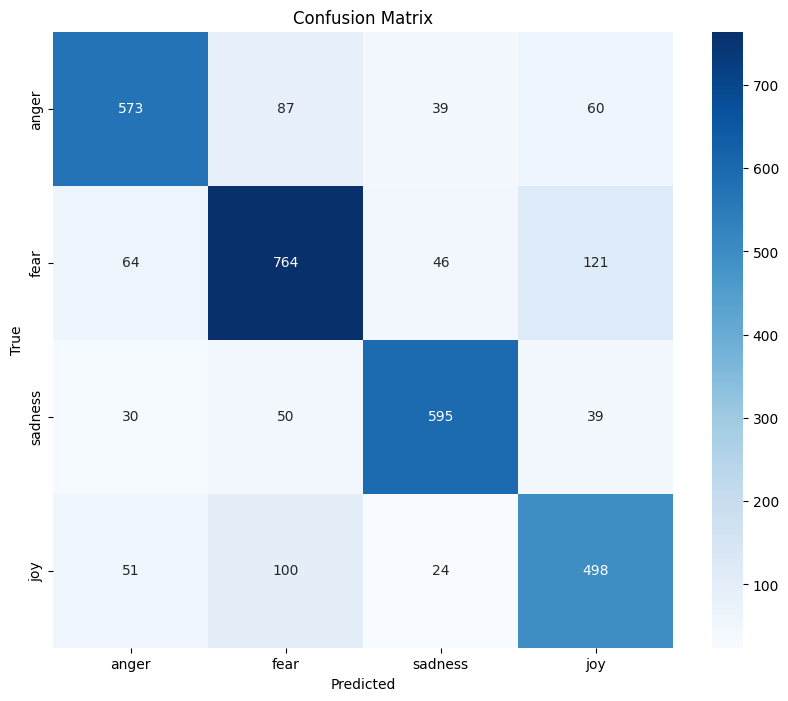

Metric BERT Multi-task Roberta_MultiTask  \
0   Classifcation Loss        0.056932          0.054059   
1      Regression Loss         0.11032          0.104601   
2          Training F1         0.97507            0.9795   
3              Test F1        0.856415          0.848456   
4        Validation F1        0.878613          0.869942   
5          Training R2        0.382943           0.47699   
6              Test R2        0.164531          0.389894   
7        Validation R2        0.043593          0.256855   
8            Max Epoch               5                17   
9           Optimzizer           AdamW             AdamW   
10       Learning Rate         0.00002           0.00002   
11            Patience               3                 3   
12          Batch Size               4               128   

   Distil_BERT_MultiTaskModal T5 Small Classification  
0                    0.041506                0.163894  
1                     0.09053                     N/A  
2                    0.978976                0.997369  
3                    0.858962                0.773639  
4                    0.881503                     N/A  
5                    0.571183                     N/A  
6                    0.404828                     N/A  
7                    0.340538                     N/A  
8                           8               17.699115  
9                       AdamW                     N/A  
10                    0.00002                     N/A  
11                          3                       3  
12                          8                      32

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer, Trainer, TrainingArguments,EarlyStoppingCallback
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch

#Load the pre-trained T5 model and tokenizer
model_name = "t5-small"
model = T5ForConditionalGeneration.from_pretrained(model_name)
tokenizer = T5Tokenizer.from_pretrained(model_name)

# Function to load and preprocess the data
def load_dataset(file_path,tokenizer):
    tokenized_data = []

    with open(file_path, encoding='utf-8') as f:
        next(f)  # Skip the header line
        for line in f:
            # print(f"Line contents: {line}")  # Add this line to print the contents of each line
            parts = line.strip().split("\t")
            # print(f"parts[1]: {parts[1]}")
            if len(parts) >= 4:
              text, emotion  =  parts[1], parts[2]
              row = {'input_text':text,'target_text':emotion}
              input_text = row['input_text']
              target_text = row['target_text']
              input_ids = tokenizer.encode("classify the emotion: " + input_text, return_tensors="pt", padding="max_length", truncation=True, max_length=64)
              target_ids = tokenizer.encode(target_text, return_tensors="pt", padding="max_length", truncation=True, max_length=64)
              tokenized_data.append({
                  "input_ids": input_ids[0],
                  "attention_mask": (input_ids[0] != 0).long(),
                  "labels": target_ids[0],
              })



    return tokenized_data


train_dataset = load_dataset('home/train.txt',tokenizer)
test_dataset = load_dataset('home/test.txt',tokenizer)
validation_dataset = load_dataset('home/dev.txt',tokenizer)

print(f'test_dataset:{test_dataset}')
BATCH_SIZE = 32
MAX_EPOCHS = 30

# Initialize the Trainer and TrainingArguments
training_args = TrainingArguments(
    output_dir="./t5",
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    save_total_limit=2,
    evaluation_strategy="steps",
    eval_steps=500,
    save_steps=500,
    num_train_epochs=MAX_EPOCHS,
    load_best_model_at_end=True,
)
EARLY_STOPPING_PATIENCE = 3

# Add EarlyStoppingCallback
early_stopping = EarlyStoppingCallback(early_stopping_patience=EARLY_STOPPING_PATIENCE, early_stopping_threshold=0.01)
callbacks = [early_stopping]

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    callbacks=callbacks,
)


# Fine-tune the model
trainer.train()

# Extract training loss values
training_loss = trainer.state.log_history[-1]['train_loss']
print(f'trainer state:{trainer.state}')

EPOCHS_USED = trainer.state.epoch
print(f'EPOCHS_USED:{EPOCHS_USED}')




# Initialize lists to store predicted and true labels
predicted_train_labels = []
true_train_labels = []


# Batch size for generating predictions
BATCH_SIZE = 32

# Generate predictions for the training dataset in smaller batches
for i in range(0, len(train_dataset), BATCH_SIZE):
    batch = train_dataset[i:i + BATCH_SIZE]
    predictions = trainer.predict(batch)
    predicted_train_labels.extend(predictions.predictions[0].argmax(axis=-1).tolist())
    true_train_labels.extend([item["labels"].tolist() for item in batch])


# Flatten the labels to 1D arrays
predicted_train_labels = [label for sublist in predicted_train_labels for label in sublist]
true_train_labels = [label for sublist in true_train_labels for label in sublist]

# Compute the F1 score
f1_train = f1_score(true_train_labels, predicted_train_labels, average='micro')
print(f'F1 Score on Training Data: {f1_train}')

#Save the model
trainer.save_model()
# Save the model, configuration, and tokenizer
model.save_pretrained("t5-classification-model")
tokenizer.save_pretrained("t5-classification-model")

# You can further evaluate the model on the test set and use it for inference.

model_predict = T5ForConditionalGeneration.from_pretrained('t5-classification-model')
tokenizer_predict = T5Tokenizer.from_pretrained('t5-classification-model',repo_type='model')

# Create a list to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Set up the device as cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

for item in test_dataset:
    input_ids = item["input_ids"].unsqueeze(0)
    attention_mask = item["attention_mask"].unsqueeze(0)

    # Generate predictions
    with torch.no_grad():
        output = model_predict.generate(input_ids, attention_mask=attention_mask, max_length=64)

    # Decode the predicted output
    predicted_text = tokenizer_predict.decode(output[0], skip_special_tokens=True)
    true_text = tokenizer_predict.decode(item["labels"], skip_special_tokens=True)

    true_labels.append(true_text)
    predicted_labels.append(predicted_text)

# Compute F1 score
f1_test = f1_score(true_labels, predicted_labels, average='micro')
print(f'F1 Score: {f1_test}')


# Create a confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion
labels = ['anger','fear','sadness','joy']
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

results_df['T5 Small Classification'] = [training_loss,'N/A',f1_train,f1_test,'N/A','N/A','N/A','N/A',EPOCHS_USED,'N/A','N/A',EARLY_STOPPING_PATIENCE,BATCH_SIZE]
results_df


# T5 Intensity Regression

In [ ]:
from transformers import T5ForConditionalGeneration,T5ForSequenceClassification, T5Tokenizer, Trainer, TrainingArguments,EarlyStoppingCallback
from sklearn.metrics import f1_score, confusion_matrix,r2_score,mean_squared_error as mse
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from tidyX import TextPreprocessor as tp

#Load the pre-trained T5 model and tokenizer
# model_name = "t5-classification-model"
model_name = "t5-small"
model = T5ForConditionalGeneration.from_pretrained(model_name)
tokenizer = T5Tokenizer.from_pretrained(model_name)

# Prepare your dataset and convert it to a format suitable for training
# Ensure your dataset is in a format like:
# Function to load and preprocess the data
def load_dataset(file_path,tokenizer):
    tokenized_data = []

    with open(file_path, encoding='utf-8') as f:
        next(f)  # Skip the header line
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 4:
              text, emotion,intensity  =  parts[1], parts[2],parts[3]
              #if float(intensity) > 0.05  and float(intensity) < 0.95:
              input_text = text
              target_intensity =intensity
              # input_ids = tokenizer.encode(f"Predict the Intensity for {emotion}: " + input_text, return_tensors="pt", padding="max_length", truncation=True, max_length=64)
              input_ids = tokenizer.encode(f"Predict the Intensity: " + input_text, return_tensors="pt", padding="max_length", truncation=True, max_length=64)

              target_ids = tokenizer.encode(target_intensity, return_tensors="pt", padding="max_length", truncation=True, max_length=64)
              # print(f'target_ids:{target_ids}')
              tokenized_data.append({
                  "input_ids": input_ids[0],
                  "attention_mask": (input_ids[0] != 0).long(),
                  #"attention_mask": (input_ids[0] != 0).float(),
                  "labels": target_ids[0],
              })




    return tokenized_data


train_dataset = load_dataset('home/train.txt',tokenizer)
test_dataset = load_dataset('home/test.txt',tokenizer)
validation_dataset = load_dataset('home/dev.txt',tokenizer)


MAX_EPOCHS = 1
EARLY_STOPPING_PATIENCE = 3
LEARNING_RATE = 5e-5
BATCH_SIZE = 64

optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
#scheduler= torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=5e-4, max_lr=5e-5)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Initialize the Trainer and TrainingArguments
training_args = TrainingArguments(
    output_dir="./t5-regression-model",
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    save_total_limit=2,
    evaluation_strategy="steps",
    learning_rate=LEARNING_RATE,
    eval_steps=500,
    save_steps=500,
    num_train_epochs=MAX_EPOCHS,
    load_best_model_at_end=True,
)

# Add EarlyStoppingCallback
early_stopping = EarlyStoppingCallback(early_stopping_patience=EARLY_STOPPING_PATIENCE,early_stopping_threshold=0.01)
callbacks = [early_stopping]

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    callbacks=callbacks,
    # optimizers=(optimizer,scheduler),
)


# Fine-tune the model
# trainer.train()

try:
    trainer.train()
except ValueError as e:
    print(f'trainer state:{trainer.state}')
    print(f"ValueError during training: {e}")
except RuntimeError as re:
    print(f'trainer state:{trainer.state}')
    print(f"ValueError during training: {re}")



# Extract training loss values
# training_loss = trainer.state.log_history[-1]['train_loss']
print(f'trainer state:{trainer.state}')

EPOCHS_USED = trainer.state.epoch
print(f'EPOCHS_USED:{EPOCHS_USED}')



# Initialize lists to store predicted and true labels
predicted_train_outputs = []
true_train_outputs = []

# Generate predictions for the training dataset
# train_predictions = trainer.predict(train_dataset)



# Generate predictions for the training dataset in smaller batches
for i in range(0, len(train_dataset), BATCH_SIZE):
    batch = train_dataset[i:i + BATCH_SIZE]
    predictions = trainer.predict(batch)
    predicted_train_outputs.extend(predictions.predictions[0].argmax(axis=-1).tolist())
    true_train_outputs.extend([item["labels"].tolist() for item in batch])

print(f'predicted_train_outputs:{predicted_train_outputs}')
print(f'true_train_outputs:{true_train_outputs}')


# Flatten the labels to 1D arrays
predicted_train_outputs = [label for sublist in predicted_train_outputs for label in sublist]
true_train_outputs = [label for sublist in true_train_outputs for label in sublist]

# Compute the F1 score
r2_train = r2_score(true_train_outputs, predicted_train_outputs)
mse_train = mse(true_train_outputs, predicted_train_outputs)
print(f'true_train_labels:{true_train_outputs}')
print(f'predicted_train_labels:{predicted_train_outputs}')
print(f'R2 Score on Training Data: {r2_train}')
print(f'MSE Score on Training Data: {mse_train}')

#Save the model
trainer.save_model()


# Save the model, configuration, and tokenizer
model.save_pretrained("t5-regression-model")
tokenizer.save_pretrained("t5-regression-model")

# You can further evaluate the model on the test set and use it for inference.

model_predict = T5ForConditionalGeneration.from_pretrained('t5-regression-model')
tokenizer_predict = T5Tokenizer.from_pretrained('t5-regression-model',repo_type='model')

# Create a list to store true labels and predicted labels
true_test_outputs = []
predicted_test_outputs = []

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

for item in test_dataset:
    input_ids = item["input_ids"].unsqueeze(0)
    attention_mask = item["attention_mask"].unsqueeze(0)

    # Generate predictions
    with torch.no_grad():
        output = model_predict.generate(input_ids, attention_mask=attention_mask, max_length=64)
        print(f'predict_output:{output}')

    # Decode the predicted output
    predicted_test_intensity = tokenizer_predict.decode(output[0], skip_special_tokens=True)
    print(f'predicted_test_intensity:{predicted_test_intensity}')
    true_test_intensity = tokenizer_predict.decode(item["labels"], skip_special_tokens=True)
    print(f'true_test_intensity:{true_test_intensity}')

    true_test_outputs.append(float(true_test_intensity))
    predicted_test_outputs.append(0.0 if predicted_test_intensity == '' else float(predicted_test_intensity))

# Compute F1 score
r2_test = r2_score(true_test_outputs, predicted_test_outputs)
mse_test = mse(true_test_outputs,predicted_test_outputs)
print(f'predicted_test_outputs:{predicted_test_outputs}')
print(f'true_test_outputs:{true_test_outputs}')
print(f'R2 Score Test: {r2_test}')
print(f'MSE Score on Test Data: {mse_test}')


# Plot the confusion

results_df['T5 Small Regression'] = ['N/A',training_loss,'N/A','N/A','N/A',r2_train,r2_test,'N/A',EPOCHS_USED,'N/A',LEARNING_RATE,EARLY_STOPPING_PATIENCE,BATCH_SIZE]
results_df


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


trainer state:TrainerState(epoch=1.0, global_step=57, max_steps=57, logging_steps=500, eval_steps=500, save_steps=500, train_batch_size=64, num_train_epochs=1, num_input_tokens_seen=0, total_flos=61089905639424.0, log_history=[{'train_runtime': 33.1974, 'train_samples_per_second': 108.774, 'train_steps_per_second': 1.717, 'total_flos': 61089905639424.0, 'train_loss': 5.263222677665844, 'epoch': 1.0, 'step': 57}], best_metric=None, best_model_checkpoint=None, is_local_process_zero=True, is_world_process_zero=True, is_hyper_param_search=False, trial_name=None, trial_params=None)
EPOCHS_USED:1.0


predicted_train_outputs:[[0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


predict_output:tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
predicted_test_intensity:
true_test_intensity:0.144
predict_output:tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
predicted_test_intensity:
true_test_intensity:0.898
predict_output:tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
predicted_test_intensity:
true_test_intensity:0.271
predict_output:tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

KeyboardInterrupt: ignored

# T5 Grid Search

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from transformers import T5ForConditionalGeneration, T5Tokenizer
# import torch
# from sklearn.metrics import r2_score, mean_squared_error as mse


# # Prepare your dataset and convert it to a format suitable for training
# # Ensure your dataset is in a format like:
# # Function to load and preprocess the data
# def load_dataset(file_path,tokenizer):
#     tokenized_data = []

#     with open(file_path, encoding='utf-8') as f:
#         next(f)  # Skip the header line
#         for line in f:
#             parts = line.strip().split("\t")
#             if len(parts) >= 4:
#               text, emotion,intensity  =  parts[1], parts[2],parts[3]
#               if float(intensity) > 0.05  and float(intensity) < 0.95:
#                 row = {'input_text':text,'target_text':intensity  }
#                 input_text = text
#                 target_text = intensity
#                 # input_ids = tokenizer.encode(f"Predict the Intensity for {emotion}: " + input_text, return_tensors="pt", padding="max_length", truncation=True, max_length=64)
#                 input_ids = tokenizer.encode(f"Predict the intensity: " + input_text, return_tensors="pt", padding="max_length", truncation=True, max_length=64)

#                 target_ids = tokenizer.encode(target_text, return_tensors="pt", padding="max_length", truncation=True, max_length=64)
#                 tokenized_data.append({
#                     "input_ids": input_ids[0],
#                     "attention_mask": (input_ids[0] != 0).long(),
#                     "labels": target_ids[0],
#                 })



#     return tokenized_data


# train_dataset = load_dataset('home/train.txt',tokenizer)
# test_dataset = load_dataset('home/test.txt',tokenizer)
# validation_dataset = load_dataset('home/dev.txt',tokenizer)

# # Function to evaluate the model with given hyperparameters
# def evaluate_model(learning_rate, batch_size, num_epochs, dropout_rate, num_heads):
#     # Initialize and train the model with given hyperparameters
#     model = T5ForConditionalGeneration.from_pretrained('t5-small')
#     tokenizer = T5Tokenizer.from_pretrained('t5-small')


#     # Set up TrainingArguments and Trainer
#     training_args = TrainingArguments(
#         output_dir="./t5-regression-model",
#         per_device_train_batch_size=batch_size,
#         per_device_eval_batch_size=batch_size,
#         evaluation_strategy="steps",
#         learning_rate=learning_rate,
#         num_train_epochs=num_epochs,
#         # Add other necessary arguments
#     )

#     # Initialize and train the Trainer object
#     trainer = Trainer(
#         model=model,
#         args=training_args,
#         train_dataset=train_dataset,
#         eval_dataset=validation_dataset,
#         # Add other necessary arguments
#     )

#     # Fine-tune the model
#     trainer.train()

#     # Evaluate the model on validation dataset
#     model_predict = T5ForConditionalGeneration.from_pretrained('t5-regression-model')
#     tokenizer_predict = T5Tokenizer.from_pretrained('t5-regression-model', repo_type='model')

#     return r2_validation, mse_validation

# # Define the hyperparameters to search
# param_grid = {
#     'learning_rate': [2e-5, 3e-5, 5e-5],
#     'batch_size': [16, 32, 64],
#     'num_epochs': [5, 10, 15],
#     'dropout_rate': [0.1, 0.2, 0.3],
#     'num_heads': [2, 4, 8]
#     # Add other hyperparameters to explore
# }

# # Use GridSearchCV to find the best combination of hyperparameters
# grid_search = GridSearchCV(estimator=evaluate_model, param_grid=param_grid, scoring='r2', cv=3)
# grid_search.fit(X_train, y_train)  # Replace X_train, y_train with your training data

# best_hyperparams = grid_search.best_params_
# best_r2_score = grid_search.best_score_

# print("Best Hyperparameters:", best_hyperparams)
# print("Best R2 Score:", best_r2_score)

#T5 Multimodal Classification + Regression

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import T5Tokenizer, T5ForConditionalGeneration, AdamW,RobertaTokenizer,RobertaForSequenceClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error as mse,r2_score,f1_score,confusion_matrix
from torch.optim import RMSprop,SGD,Adagrad
import torch.nn as nn
from torcheval.metrics import R2Score
from tidyX import TextPreprocessor as tp
from scipy.stats import pearsonr
import matplotlib.pyplot as plt



# Load pre-trained BERT tokenizer and model
tokenizer = T5Tokenizer.from_pretrained('t5-small')
multi_task_model = T5ForConditionalGeneration.from_pretrained('t5-small')

class RegressionHead(torch.nn.Module):
    def __init__(self, hidden_size):
        super(RegressionHead, self).__init__()
        self.regression = torch.nn.Linear(hidden_size,1)

    def forward(self, x):
        x = self.regression(x)
        return x

# Define the Multi-Task Emotion Model
class MultiTaskEmotionModel(torch.nn.Module):
    def __init__(self, bert_model, num_classes):
        super(MultiTaskEmotionModel, self).__init__()
        self.bert = bert_model
        self.classification_head = torch.nn.Linear(self.bert.config.hidden_size, num_classes)
        self.regression_head = RegressionHead(self.bert.config.hidden_size)




    def forward(self, input_ids, attention_mask=None):

        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask,output_hidden_states=True)

        pooled_output = outputs.hidden_states[-1][:, 0, :]

        # For classification task
        classification_logits = self.classification_head(pooled_output)


        # For regression task
        regression_output = self.regression_head(pooled_output)


        return classification_logits, regression_output

# Function to load and preprocess the data
def load_data(file_path, tokenizer):
    inputs = []
    targets = []

    with open(file_path, encoding='utf-8') as f:
        next(f)  # Skip the header line
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 4:
              text, emotion, intensity =  parts[1], parts[2], float(parts[3])
              #Preprocess Text
              # preprocessed_text = tp.preprocess(text,delete_emojis=False,exceptions=[])
              # texts.append(preprocessed_text)
              # labels_classification.append(emotion)
              # labels_regression.append(intensity)
              # if intensity > 0.05  and intensity < 0.95:
                # preprocessed_text = tp.preprocess(text,delete_emojis=False)
              input_text = f"predict emotion and intensity: {text}"
              inputs.append(input_text)
              target_text = f"{emotion} {intensity}"
              targets.append(target_text)



    tokenized_inputs = tokenizer(inputs, padding=True, truncation=True, return_tensors='pt')
    tokenized_targets = tokenizer(targets, padding=True, truncation=True, return_tensors='pt')

    # Use label encoding for emotion labels
    # emotion_label_encoder = LabelEncoder()
    # labels_classification_encoded = emotion_label_encoder.fit_transform(labels_classification)

    # labels_classification = torch.tensor(labels_classification_encoded)
    # labels_classification = torch.tensor(labels_classification)
    # labels_regression = torch.tensor(labels_regression,dtype=torch.float)


    return TensorDataset(tokenized_inputs.input_ids, tokenized_inputs.attention_mask, tokenized_targets.input_ids, tokenized_targets.attention_mask)

# # Load the data
train_dataset = load_data('home/train.txt', tokenizer)
valid_dataset = load_data('home/dev.txt', tokenizer)
test_dataset = load_data('home/test.txt', tokenizer)

# Create DataLoader objects
BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE,shuffle=True)

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the multi-task model
NUM_CLASSES = 4  # Number of emotion categories (anger, fear, joy, sadness)
# multi_task_model = MultiTaskEmotionModel(classification_model, num_classes=NUM_CLASSES)
multi_task_model.to(device)

LEARNING_RATE = 2e-5
OPTIMIZER = 'AdamW'

# Set up the optimizer and loss functions
optimizer = torch.optim.AdamW(multi_task_model.parameters(), lr=LEARNING_RATE)
# optimizer = RMSprop(multi_task_model.parameters(), lr=LEARNING_RATE)
# optimizer = SGD(multi_task_model.parameters(), lr=LEARNING_RATE,momentum=0)
# optimizer = Adagrad(multi_task_model.parameters(), lr=LEARNING_RATE)




classification_criterion = torch.nn.CrossEntropyLoss()
# classification_criterion = torch.nn.BCEWithLogitsLoss()
# regression_criterion = torch.nn.MSELoss()
regression_criterion = nn.L1Loss()

# Train the multi-task model
NUM_EPOCHS = 30
# Early stopping parameters
# early_stopping_patience = 3  # Number of epochs to wait for improvement
best_combined_loss = float('inf')  # Initialize the best validation loss
no_improvement_count = 0  # Initialize the count for the number of epochs with no improvement
list_total_train_loss = []
list_train_regression_loss = []
list_train_classification_loss = []

for epoch in range(NUM_EPOCHS):
    multi_task_model.train()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    total_val_classification_loss = 0.0
    total_val_regression_loss = 0.0
    combined_val_total_loss =0.0
    #train
    all_predicted_train_labels = []
    all_true_train_labels = []
    all_predicted_train_outputs = []
    all_true_train_outputs = []



    for batch in train_loader:

        classification_labels = batch[2].to(device)
        regression_labels = batch[3].to(device)

        # Concatenate the classification and regression labels into a single tensor
        concatenated_labels = torch.cat((classification_labels.unsqueeze(1), regression_labels.unsqueeze(1)), dim=1)

        inputs = {
            "input_ids": batch[0].to(device),
            "attention_mask": batch[1].to(device),
            # "labels":concatenated_labels
            "labels": {
                "classification": batch[2].to(device),
                "regression": batch[3].to(device)
            }

        }

        outputs = multi_task_model(inputs)

        # Compute losses
        classification_loss = outputs.loss['classification']
        regression_loss = outputs.loss['regression']
        total_loss = classification_loss + regression_loss

        # Backward pass and optimization step
        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()


        ## The loss is aggregated for each iteration representing a batch to come with the combined loss of whole epoch for classification and regression
        total_classification_loss += classification_loss.item()
        total_regression_loss += regression_loss.item()


        ## Classification Accuracy variables
        predicted_labels = classification_logits.argmax(dim=1)
        all_predicted_train_labels.extend(predicted_labels.cpu().numpy())
        all_true_train_labels.extend(batch_labels_classification.cpu().numpy())


        # Regression Training Accuracy outputs
        predicted_outputs = regression_output.cpu().detach().numpy()
        true_outputs = batch_labels_regression.cpu()

        all_predicted_train_outputs.extend(predicted_outputs.flatten())
        all_true_train_outputs.extend(true_outputs)




    ## Validation

    for batch in valid_loader:
        inputs = {
            "input_ids": batch[0].to(device),
            "attention_mask": batch[1].to(device),
            "labels": {
                "classification": batch[2].to(device),
                "regression": batch[3].to(device)
            }
        }

        outputs = multi_task_model(**inputs)

        # Compute losses
        classification_val_loss = outputs.loss['classification']
        regression_val_loss = outputs.loss['regression']
        combined_val_loss = classification_loss + regression_loss


        total_val_classification_loss += classification_loss.item()
        total_val_regression_loss += regression_loss.item()
        combined_val_total_loss = total_val_classification_loss + total_val_regression_loss





    average_combined_val_loss = combined_val_total_loss/len(valid_loader)
    print(f'average_combined_val_loss:{average_combined_val_loss}')
    # Check for early stopping
    if average_combined_val_loss < best_combined_loss:
        best_combined_loss = average_combined_val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    # If there's no improvement for the specified patience, stop training
    if no_improvement_count >= early_stopping_patience:
        print(f'Early stopping triggered after {epoch + 1} epochs without improvement.')
        break



    ## Training Metrics
    classification_train_accuracy = f1_score(all_true_train_labels, all_predicted_train_labels,average='weighted')

    ## Calculate Regression Accuracy using R2
    regression_train_accuracy = r2_score(all_true_train_outputs,all_predicted_train_outputs)

    print(f'all_true_train_outputs:{all_true_train_outputs}')
    print(f'all_predicted_train_outputs:{all_predicted_train_outputs}')



    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}, '
          f'Classification Loss: {total_classification_loss / len(train_loader):.3f}, '
          f'Regression Loss: {total_regression_loss / len(train_loader):.3f}')

    print(f'Clasification Training F1 Score: {classification_train_accuracy}')
    print(f'Regression Training R2 Score {regression_train_accuracy}')

    class_loss = total_classification_loss / len(train_loader)
    reg_loss = total_regression_loss / len(train_loader)

        ##Total Regression Loss are added for each epoch
    list_train_regression_loss.append(reg_loss)

    ##Total Classification Loss is added for each epoch
    list_train_classification_loss.append(class_loss)

    ## Combined Training loss
    list_total_train_loss.append(reg_loss + class_loss)

    print(f'list_train_regression_loss:{list_train_regression_loss}')

# Plotting loss with epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epoch + 1), list_total_train_loss, label='Total Loss')
plt.plot(range(1, epoch + 1), list_train_classification_loss, label='Classification Loss')
plt.plot(range(1, epoch + 1), list_train_regression_loss, label='Regression Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Function for evaluation
def evaluate_model(model, data_loader, classification_criterion, regression_criterion):
    model.eval()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    all_predicted_labels = []
    all_true_labels = []
    all_predicted_outputs = []
    all_true_outputs = []

    with torch.no_grad():
      for batch in data_loader:
          inputs = {
              "input_ids": batch[0].to(device),
              "attention_mask": batch[1].to(device)
          }

          # For classification task
          classification_labels = batch[2].cpu().numpy()
          all_true_labels.extend(classification_labels)

          # Get classification logits
          outputs = model(**inputs)
          classification_logits = outputs.logits.detach().cpu().numpy().argmax(axis=1)
          all_predicted_labels.extend(classification_logits)

          # For regression task
          regression_labels = batch[3].cpu().numpy()
          all_true_outputs.extend(regression_labels)

          # Get regression outputs (you need to adapt this based on your model)
          regression_outputs = outputs.regression_outputs.detach().cpu().numpy()
          all_predicted_outputs.extend(regression_outputs)

          # # classification_logits, regression_output = model(input_ids, attention_mask=attention_mask)
          # classification_logits, regression_output = model(batch_input_ids, attention_mask=batch_attention_mask)

          # ## Classification Accuracy
          # predicted_labels = classification_logits.argmax(dim=1)

          # all_predicted_labels.extend(predicted_labels.cpu().numpy())
          # all_true_labels.extend(batch_labels_classification.cpu().numpy())

          # ## Regression Accuracy Variables
          # ## Round predicted output to 3 decimals as per the input
          # predicted_outputs = np.round(regression_output.flatten().cpu(),decimals=3)
          # true_outputs = batch_labels_regression.cpu()

          # # all_predicted_outputs.extend(predicted_outputs)
          # all_predicted_outputs.extend(predicted_outputs.flatten())

          # all_true_outputs.extend(true_outputs)





    #Classification Accuracy
    classification_accuracy = f1_score(all_true_labels, all_predicted_labels)

    ## Regression Accuracy
    regression_r2_score = r2_score(all_true_outputs, all_predicted_outputs)

    ##Pearson correlation
    correlation_coefficient, p_value = pearsonr(all_predicted_outputs, all_true_outputs)
    print(f"Pearson correlation in evaluate : {correlation_coefficient}")
    print(f"P-value Training: {p_value}")

    ## Calculate Mean Squared Error
    reg_mse = mse(all_true_outputs,all_predicted_outputs)

    print(f'reg mse: {reg_mse}')


    # return avg_classification_loss, avg_regression_loss, classification_accuracy,regression_r2_score, correlation_coefficient
    return classification_accuracy,regression_r2_score, correlation_coefficient


# # Evaluate the model on the validation set
valid_classification_accuracy, valid_regression_accuracy,valid_correlation_coefficient = evaluate_model(multi_task_model, valid_loader,
                                                                   classification_criterion, regression_criterion)

print(f'Validation Classification Accuracy: {valid_classification_accuracy:.3f}')
print(f'Validation Regression Accuracy: {valid_regression_accuracy:.3f}')
print(f'Validation Correlation Coefficient: {valid_correlation_coefficient:.3f}')




# Evaluate the model on the test set
test_classification_accuracy,test_regression_accuracy,test_correlation_coefficient = evaluate_model(multi_task_model, test_loader,
                                                                 classification_criterion, regression_criterion)




print(f'Test Regression Accuracy: {test_regression_accuracy:.3f}')
print(f'Test Classification Accuracy: {test_classification_accuracy:.3f}')
print(f'Test Correlation Coefficient: {test_correlation_coefficient:.3f}')




results_df['T5 Multi-task'] = [total_classification_loss / len(train_loader),total_regression_loss / len(train_loader),classification_train_accuracy,test_classification_accuracy,valid_classification_accuracy,regression_train_accuracy,test_regression_accuracy,valid_regression_accuracy,epoch,OPTIMIZER,LEARNING_RATE,early_stopping_patience, BATCH_SIZE]
results_df




Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


AttributeError: ignored

# Classification Distil BERT

In [ ]:
## Distil Roberta Classification

import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score,f1_score,confusion_matrix



# Load pre-trained BERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
multi_task_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')




# Define the Multi-Task Emotion Model
class SingleTaskEmotionModel(torch.nn.Module):
    def __init__(self, bert_model, num_classes):
        super(SingleTaskEmotionModel, self).__init__()
        self.bert = bert_model
        self.classification_head = torch.nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        # print(f"input_ids: {input_ids}")
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask,output_hidden_states=True)

        # Extract last hidden state
        pooled_output = outputs.hidden_states[-1][:, 0, :]

        # For classification task
        classification_logits = self.classification_head(pooled_output)

        return classification_logits

# Function to load and preprocess the data
def load_data(file_path, tokenizer):
    texts = []
    labels_classification = []

    with open(file_path, encoding='utf-8') as f:
        next(f)  # Skip the header line
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 4:
              text, emotion, intensity =  parts[1], parts[2], float(parts[3])
              texts.append(text)
              labels_classification.append(emotion)


    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

    # Use label encoding for emotion labels
    emotion_label_encoder = LabelEncoder()
    labels_classification_encoded = emotion_label_encoder.fit_transform(labels_classification)

    labels_classification = torch.tensor(labels_classification_encoded)


    return TensorDataset(inputs.input_ids, inputs.attention_mask, labels_classification)

# # Load the data
train_dataset = load_data('home/train.txt', tokenizer)
valid_dataset = load_data('home/dev.txt', tokenizer)
test_dataset = load_data('home/test.txt', tokenizer)

# Create DataLoader objects
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the multi-task model
NUM_CLASSES = 4  # Number of emotion categories (anger, fear, joy, sadness)
single_task_model = SingleTaskEmotionModel(classification_model, num_classes=NUM_CLASSES)
single_task_model.to(device)

# Hyperparameters
LEARNING_RATE = 2e-5
OPTIMIZER = 'AdamW'
# Set up the optimizer and loss functions
optimizer = AdamW(multi_task_model.parameters(), lr=LEARNING_RATE)
classification_criterion = torch.nn.CrossEntropyLoss()

# Train the single-task model
NUM_EPOCHS = 30
# Early stopping parameters
early_stopping_patience = 6  # Number of epochs to wait for improvement
best_combined_loss = float('inf')  # Initialize the best validation loss
no_improvement_count = 0  # Initialize the count for the number of epochs with no improvement
for epoch in range(NUM_EPOCHS):
    single_task_model.train()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    all_predicted_train_labels = []
    all_true_train_labels = []

    for batch in train_loader:
        batch_input_ids, batch_attention_mask, batch_labels_classification = batch
        batch_input_ids, batch_attention_mask, batch_labels_classification = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device)

        optimizer.zero_grad()
        classification_logits = single_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        # Compute losses for classification and regression tasks
        classification_loss = classification_criterion(classification_logits, batch_labels_classification)


        classification_loss.backward()
        optimizer.step()

        total_classification_loss += classification_loss.item()

        ## Classification Accuracy variables
        predicted_labels = classification_logits.argmax(dim=1)
        all_predicted_train_labels.extend(predicted_labels.cpu().numpy())
        all_true_train_labels.extend(batch_labels_classification.cpu().numpy())

     ## Validation

    for batch in valid_loader:
        single_task_model.eval()
        batch_input_ids, batch_attention_mask, batch_labels_classification = batch
        batch_input_ids, batch_attention_mask, batch_labels_classification = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device)

        optimizer.zero_grad()
        classification_logits = single_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        # Compute losses for classification and regression tasks
        classification_val_loss = classification_criterion(classification_logits, batch_labels_classification)


        total_val_classification_loss += classification_loss.item()


    average_combined_val_loss = classification_val_loss/len(valid_loader)
    print(f'average_combined_val_loss:{average_combined_val_loss}')
    # Check for early stopping
    if average_combined_val_loss < best_combined_loss:
        best_combined_loss = average_combined_val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    # If there's no improvement for the specified patience, stop training
    if no_improvement_count >= early_stopping_patience:
        print(f'Early stopping triggered after {epoch + 1} epochs without improvement.')
        break


    ## Calculate Classification Accuracy
    classification_accuracy = f1_score(all_true_train_labels, all_predicted_train_labels,average='weighted')

    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}, '
          f'Classification Loss: {total_classification_loss / len(train_loader):.3f}')
    print(f'Clasification Training F1 Score: {classification_accuracy}')

# Function for evaluation
def evaluate_model(model, data_loader, classification_criterion):
    model.eval()
    total_classification_loss = 0.0
    all_predicted_labels = []
    all_true_labels = []


    with torch.no_grad():
        for batch in data_loader:
            batch_input_ids, batch_attention_mask, batch_labels_classification = batch
            batch_input_ids, batch_attention_mask, batch_labels_classification = \
                batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device)


            classification_logits = model(batch_input_ids, attention_mask=batch_attention_mask)


            ## Classification Accuracy
            predicted_labels = classification_logits.argmax(dim=1)

            all_predicted_labels.extend(predicted_labels.cpu().numpy())
            all_true_labels.extend(batch_labels_classification.cpu().numpy())


            classification_loss = classification_criterion(classification_logits, batch_labels_classification)
            total_classification_loss += classification_loss.item()

    #Classification Accuracy
    classification_accuracy = f1_score(all_true_labels, all_predicted_labels,average='weighted')

    avg_classification_loss = total_classification_loss / len(data_loader)

    return avg_classification_loss, classification_accuracy

# # Evaluate the model on the validation set
valid_classification_loss, valid_classification_accuracy = evaluate_model(single_task_model, valid_loader,
                                                                   classification_criterion)
print(f'Validation Classification Loss: {valid_classification_loss:.3f}')
print(f'Validation Classification Accuracy: {valid_classification_accuracy:.3f}')



# Evaluate the model on the test set
test_classification_loss,test_classification_accuracy = evaluate_model(single_task_model, test_loader,
                                                                 classification_criterion)



print(f'Test Classification Loss: {test_classification_loss:.3f}')
print(f'Test Classification Accuracy: {test_classification_accuracy:.3f}')



results_df['Distil_BERT_Classification'] = [total_classification_loss / len(train_loader),'N/A',classification_accuracy,test_classification_accuracy,valid_classification_accuracy,'N/A','N/A','N/A',epoch,OPTIMIZER,LEARNING_RATE,early_stopping_patience,BATCH_SIZE]
results_df



Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


average_combined_val_loss:0.16346776485443115
Epoch 1/30, Classification Loss: 1.534
Clasification Training F1 Score: 0.11762628268281773
average_combined_val_loss:0.16346776485443115
Epoch 2/30, Classification Loss: 1.531
Clasification Training F1 Score: 0.11858028472988091
average_combined_val_loss:0.16346776485443115
Epoch 3/30, Classification Loss: 1.531
Clasification Training F1 Score: 0.11390653601854145
average_combined_val_loss:0.16346776485443115
Epoch 4/30, Classification Loss: 1.530
Clasification Training F1 Score: 0.11684202629393084
average_combined_val_loss:0.16346776485443115
Epoch 5/30, Classification Loss: 1.530
Clasification Training F1 Score: 0.11542039914591795
average_combined_val_loss:0.16346776485443115
Epoch 6/30, Classification Loss: 1.532
Clasification Training F1 Score: 0.12039964639288658
average_combined_val_loss:0.16346776485443115
Early stopping triggered after 7 epochs without improvement.
Validation Classification Loss: 1.530
Validation Classification A

Metric Roberta_MultiTask Distil_BERT_MultiTaskModal  \
0   Classifcation Loss          0.076129                   0.047473   
1      Regression Loss          0.121394                    0.09349   
2          Training F1          0.967907                   0.982267   
3              Test F1          0.850048                   0.859599   
4        Validation F1          0.867052                   0.881503   
5          Training R2           0.35587                   0.598017   
6              Test R2          0.399986                   0.213915   
7        Validation R2          0.288987                   0.143526   
8            Max Epoch                 8                          8   
9           Optimzizer             AdamW                      AdamW   
10       Learning Rate           0.00002                    0.00002   
11            Patience                 3                          3   
12          Batch Size                64                          8   

   BERT Multi-task Distil_BERT_Classification  
0         0.050274                   1.531524  
1         0.114965                        N/A  
2         0.979485                     0.1204  
3         0.854505                   0.155996  
4         0.855491                   0.143666  
5         0.414609                        N/A  
6         0.359579                        N/A  
7         0.197957                        N/A  
8                9                          6  
9            AdamW                      AdamW  
10         0.00002                    0.00002  
11               3                          6  
12              64                         32

# Multitask Distil BERT

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


average_combined_val_loss:0.8427550196647644
Epoch 1/30, Classification Loss: 0.893, Regression Loss: 0.174
Clasification Training F1 Score: 0.6068996007137847
Regression Training R2 Score -0.38572985412322547
average_combined_val_loss:0.2055760994553566
Epoch 2/30, Classification Loss: 0.330, Regression Loss: 0.146
Clasification Training F1 Score: 0.882155067836458
Regression Training R2 Score 0.046620963542226
average_combined_val_loss:0.40243232250213623
Epoch 3/30, Classification Loss: 0.189, Regression Loss: 0.134
Clasification Training F1 Score: 0.9341561257171782
Regression Training R2 Score 0.19884030794009722
average_combined_val_loss:0.13656236603856087
Epoch 4/30, Classification Loss: 0.116, Regression Loss: 0.124
Clasification Training F1 Score: 0.9598357347705505
Regression Training R2 Score 0.31507699221018903
average_combined_val_loss:0.15275347791612148
Epoch 5/30, Classification Loss: 0.077, Regression Loss: 0.118
Clasification Training F1 Score: 0.9717467633148356
Reg

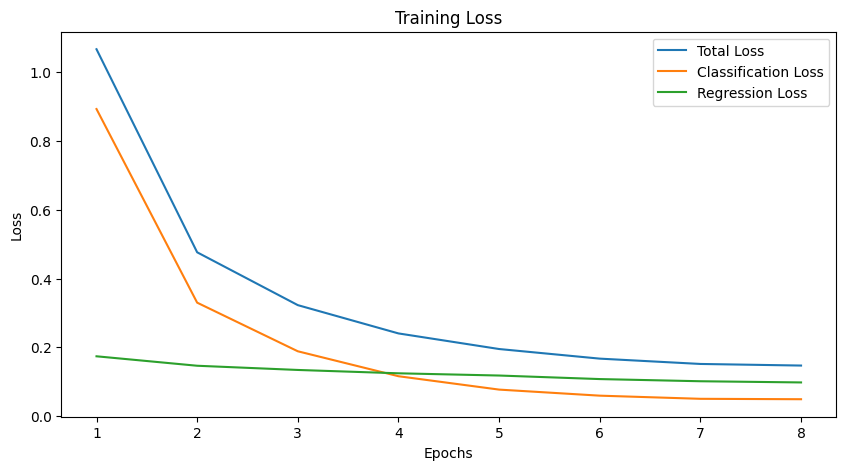

Pearson correlation in evaluate : 0.616688638579746
P-value Training: 1.2470585238530997e-37


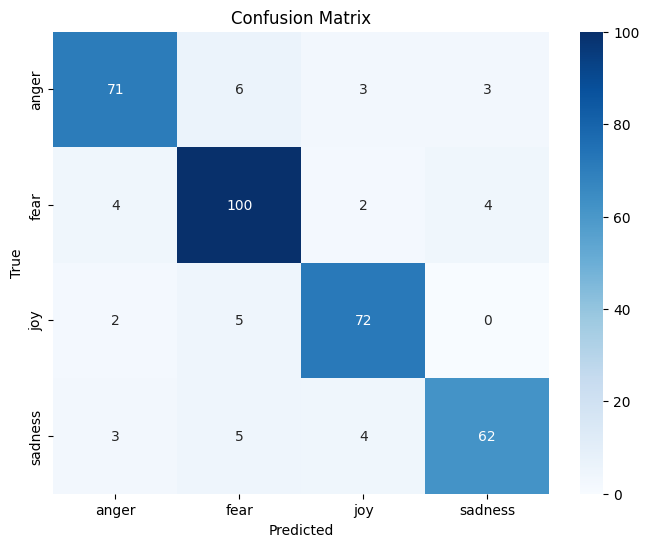

Validation Classification Loss: 0.533, Validation Regression Loss: 0.118
Validation Classification Accuracy: 0.882
Validation Regression Accuracy: 0.341
Validation Pearson Correlation: 0.617
Pearson correlation in evaluate : 0.6563616814126982
P-value Training: 0.0


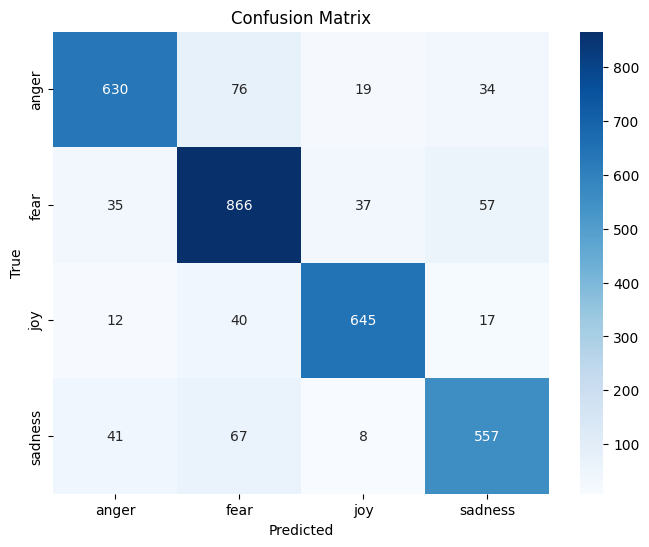

Test Classification Loss: 0.546, Test Regression Loss: 0.119
Test Regression Accuracy: 0.405
Test Classification Accuracy: 0.859
Test Pearson Correlation: 0.656


Metric BERT Multi-task Roberta_MultiTask  \
0   Classifcation Loss        0.056979           0.05003   
1      Regression Loss        0.108563          0.108945   
2          Training F1         0.97865          0.974823   
3              Test F1        0.844317          0.862783   
4        Validation F1        0.864162          0.869942   
5          Training R2        0.454134          0.403911   
6              Test R2        0.340289          0.288116   
7        Validation R2        0.106641           0.14591   
8            Max Epoch               8                10   
9           Optimzizer           AdamW             AdamW   
10       Learning Rate         0.00002           0.00002   
11            Patience               3                 3   
12          Batch Size              64                32   

   Distil_BERT_MultiTaskModal  
0                    0.041506  
1                     0.09053  
2                    0.978976  
3                    0.858962  
4                    0.881503  
5                    0.571183  
6                    0.404828  
7                    0.340538  
8                           8  
9                       AdamW  
10                    0.00002  
11                          3  
12                          8

In [ ]:
## Distil BERT multitask

import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score,f1_score,confusion_matrix
from tidyX import TextPreprocessor as tp



# Load pre-trained BERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
multi_task_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')



# Define the Multi-Task Emotion Model
class MultiTaskEmotionModel(torch.nn.Module):
    def __init__(self, bert_model, num_classes):
        super(MultiTaskEmotionModel, self).__init__()
        self.bert = bert_model
        self.classification_head = torch.nn.Linear(self.bert.config.hidden_size, num_classes)
        self.regression_head = torch.nn.Linear(self.bert.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask=None):
        # print(f"input_ids: {input_ids}")
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask,output_hidden_states=True)

        # Extract last hidden state
        pooled_output = outputs.hidden_states[-1][:, 0, :]

        # For classification task
        classification_logits = self.classification_head(pooled_output)


        # For regression task
        regression_output = self.regression_head(pooled_output)



        return classification_logits, regression_output

# Function to load and preprocess the data
def load_data(file_path, tokenizer):
    texts = []
    labels_classification = []
    labels_regression = []

    with open(file_path, encoding='utf-8') as f:
        next(f)  # Skip the header line
        for line in f:
            parts = line.strip().split("\t")
            if len(parts) >= 4:
              text, emotion, intensity =  parts[1], parts[2], float(parts[3])
              # if intensity > 0.05  and intensity < 0.95:
              #   preprocessed_text = tp.preprocess(text,delete_emojis=False)
              texts.append(text)
              labels_classification.append(emotion)
              labels_regression.append(intensity)



    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

    # Use label encoding for emotion labels
    emotion_label_encoder = LabelEncoder()
    labels_classification_encoded = emotion_label_encoder.fit_transform(labels_classification)

    labels_classification = torch.tensor(labels_classification_encoded)

    labels_regression = torch.tensor(labels_regression,dtype=torch.float)


    return TensorDataset(inputs.input_ids, inputs.attention_mask, labels_classification, labels_regression)

# # Load the data
train_dataset = load_data('home/train.txt', tokenizer)
valid_dataset = load_data('home/dev.txt', tokenizer)
test_dataset = load_data('home/test.txt', tokenizer)

# Create DataLoader objects
BATCH_SIZE = 8
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the multi-task model
NUM_CLASSES = 4  # Number of emotion categories (anger, fear, joy, sadness)
multi_task_model = MultiTaskEmotionModel(multi_task_model, num_classes=NUM_CLASSES)
multi_task_model.to(device)

LEARNING_RATE = 2e-5
OPTIMIZER = 'AdamW'
# Set up the optimizer and loss functions
optimizer = torch.optim.AdamW(multi_task_model.parameters(), lr=LEARNING_RATE)
classification_criterion = torch.nn.CrossEntropyLoss()
regression_criterion = torch.nn.L1Loss()

## Store loss at each epoch
list_total_train_loss = []
list_train_regression_loss = []
list_train_classification_loss = []


# Train the multi-task model
NUM_EPOCHS = 30
# Early stopping parameters
early_stopping_patience = 3  # Number of epochs to wait for improvement
best_combined_loss = float('inf')  # Initialize the best validation loss
no_improvement_count = 0  # Initialize the count for the number of epochs with no improvement
for epoch in range(NUM_EPOCHS):
    multi_task_model.train()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    total_val_classification_loss = 0.0
    total_val_regression_loss = 0.0
    combined_val_total_loss =0.0
    #train
    all_predicted_train_labels = []
    all_true_train_labels = []
    all_predicted_train_outputs = []
    all_true_train_outputs = []



    for batch in train_loader:
        batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        classification_logits, regression_output = multi_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        # Compute losses for classification and regression tasks
        classification_loss = classification_criterion(classification_logits, batch_labels_classification)
        regression_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)


        # Total loss is a weighted combination of classification and regression losses
        total_loss = classification_loss + regression_loss

        total_loss.backward()
        optimizer.step()

        total_classification_loss += classification_loss.item()
        total_regression_loss += regression_loss.item()

        ## Classification Accuracy variables
        predicted_labels = classification_logits.argmax(dim=1)
        all_predicted_train_labels.extend(predicted_labels.cpu().numpy())
        all_true_train_labels.extend(batch_labels_classification.cpu().numpy())


        # Regression Training Accuracy outputs

        predicted_outputs = regression_output.flatten()
        true_outputs = batch_labels_regression

        all_predicted_train_outputs.extend(predicted_outputs)
        all_true_train_outputs.extend(true_outputs)

    ## Validation

    for batch in valid_loader:
        multi_task_model.eval()
        batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = batch
        batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = \
            batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device), batch_labels_regression.to(device)

        optimizer.zero_grad()
        classification_logits, regression_output = multi_task_model(batch_input_ids, attention_mask=batch_attention_mask)

        # Compute losses for classification and regression tasks
        classification_val_loss = classification_criterion(classification_logits, batch_labels_classification)


        regression_val_loss = regression_criterion(regression_output.squeeze(), batch_labels_regression)


        # Total loss is a weighted combination of classification and regression losses
        combined_val_loss = classification_val_loss + regression_val_loss

        total_val_classification_loss += classification_loss.item()
        total_val_regression_loss += regression_loss.item()
        combined_val_total_loss = total_val_classification_loss + total_val_regression_loss





    average_combined_val_loss = combined_val_total_loss/len(valid_loader)
    print(f'average_combined_val_loss:{average_combined_val_loss}')
    # Check for early stopping
    if average_combined_val_loss < best_combined_loss:
        best_combined_loss = average_combined_val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    # If there's no improvement for the specified patience, stop training
    if no_improvement_count >= early_stopping_patience:
        print(f'Early stopping triggered after {epoch + 1} epochs without improvement.')
        break



    ## Calculate Classification Accuracy
    classification_accuracy = f1_score(all_true_train_labels, all_predicted_train_labels,average='weighted')

    ## Calculate Regression Accuracy using R2
    regression_train_accuracy = r2_score([item.detach().cpu().numpy() for item in all_true_train_outputs], [item.detach().cpu().numpy() for item in all_predicted_train_outputs])

    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}, '
          f'Classification Loss: {total_classification_loss / len(train_loader):.3f}, '
          f'Regression Loss: {total_regression_loss / len(train_loader):.3f}')

    print(f'Clasification Training F1 Score: {classification_accuracy}')
    print(f'Regression Training R2 Score {regression_train_accuracy}')

    avg_class_loss = total_classification_loss / len(train_loader)
    avg_reg_loss = total_regression_loss / len(train_loader)

    ##Total Regression Loss are added for each epoch
    list_train_regression_loss.append(avg_reg_loss)

    ##Total Classification Loss is added for each epoch
    list_train_classification_loss.append(avg_class_loss)

    ## Combined Training loss
    list_total_train_loss.append(avg_reg_loss + avg_class_loss)


# Plotting Training loss with epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epoch + 1), list_total_train_loss, label='Total Loss')
plt.plot(range(1, epoch + 1), list_train_classification_loss, label='Classification Loss')
plt.plot(range(1, epoch + 1), list_train_regression_loss, label='Regression Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Function for evaluation
def evaluate_model(model, data_loader, classification_criterion, regression_criterion):
    model.eval()
    total_classification_loss = 0.0
    total_regression_loss = 0.0
    all_predicted_labels = []
    all_true_labels = []
    all_predicted_outputs = []
    all_true_outputs = []

    with torch.no_grad():
        for batch in data_loader:
            batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = batch
            batch_input_ids, batch_attention_mask, batch_labels_classification, batch_labels_regression = \
                batch_input_ids.to(device), batch_attention_mask.to(device), batch_labels_classification.to(device), batch_labels_regression.to(device)


            classification_logits, regression_output = model(batch_input_ids, attention_mask=batch_attention_mask)


            ## Classification Accuracy
            predicted_labels = classification_logits.argmax(dim=1)

            all_predicted_labels.extend(predicted_labels.cpu().numpy())
            all_true_labels.extend(batch_labels_classification.cpu().numpy())

            ## Regression Accuracy Variables
            predicted_outputs = regression_output.flatten().cpu()


            true_outputs = batch_labels_regression.cpu()

            all_predicted_outputs.extend(predicted_outputs)
            all_true_outputs.extend(true_outputs)



            classification_loss = classification_criterion(classification_logits, batch_labels_classification)
            regression_loss = regression_criterion(regression_output.squeeze(),batch_labels_regression)



            total_classification_loss += classification_loss.item()
            total_regression_loss += regression_loss.item()

    #Classification Accuracy
    classification_accuracy = accuracy_score(all_true_labels, all_predicted_labels)


    # Calculate the R-squared (R2) score
    regression_accuracy = r2_score(all_true_outputs, all_predicted_outputs)


    ##Pearson correlation
    correlation_coefficient, p_value = pearsonr(all_predicted_outputs, all_true_outputs)
    print(f"Pearson correlation in evaluate : {correlation_coefficient}")
    print(f"P-value Training: {p_value}")

    avg_classification_loss = total_classification_loss / len(data_loader)
    avg_regression_loss = total_regression_loss / len(data_loader)

    ## Visualizations
    # Create confusion matrix
    conf_matrix = confusion_matrix(all_true_labels, all_predicted_labels)

    # plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['anger', 'fear', 'joy', 'sadness'],
                yticklabels=['anger', 'fear', 'joy', 'sadness'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


    return avg_classification_loss, avg_regression_loss, classification_accuracy,regression_accuracy,correlation_coefficient

# # Evaluate the model on the validation set
valid_classification_loss, valid_regression_loss, valid_classification_accuracy, valid_regression_accuracy,valid_correlation_coefficient = evaluate_model(multi_task_model, valid_loader,
                                                                   classification_criterion, regression_criterion)
print(f'Validation Classification Loss: {valid_classification_loss:.3f}, '
      f'Validation Regression Loss: {valid_regression_loss:.3f}')
print(f'Validation Classification Accuracy: {valid_classification_accuracy:.3f}')
print(f'Validation Regression Accuracy: {valid_regression_accuracy:.3f}')
print(f'Validation Pearson Correlation: {valid_correlation_coefficient:.3f}')




# Evaluate the model on the test set
test_classification_loss, test_regression_loss,test_classification_accuracy,test_regression_accuracy,test_correlation_coefficient = evaluate_model(multi_task_model, test_loader,
                                                                 classification_criterion, regression_criterion)



print(f'Test Classification Loss: {test_classification_loss:.3f}, '
      f'Test Regression Loss: {test_regression_loss:.3f}')
print(f'Test Regression Accuracy: {test_regression_accuracy:.3f}')
print(f'Test Classification Accuracy: {test_classification_accuracy:.3f}')
print(f'Test Pearson Correlation: {test_correlation_coefficient:.3f}')



results_df['Distil_BERT_MultiTaskModal'] = [total_classification_loss / len(train_loader),total_regression_loss / len(train_loader),classification_accuracy,test_classification_accuracy,valid_classification_accuracy,regression_train_accuracy,test_regression_accuracy,valid_regression_accuracy,epoch,OPTIMIZER,LEARNING_RATE,early_stopping_patience,BATCH_SIZE]
results_df

